# Q Learning Generalization

- In continuous space, the Q learining algorithm based on grid world state that we implemented in the cart-pole is not good enough due to the curse of dimensionality.

- Example of generalization: when people drive, they do not necessarily remember each distintive state. Instead, they based on their observation, generalizing the state based on that and make a decision (look at the scene in front and drive) 

- Based on https://github.com/lazyprogrammer/

- Pseudocode (from Berkeley Deep Reinforcement Learning course)

<img src="Q_Learning.png">

In [1]:
import gym
import numpy as np

## Visualization purpose
import helper
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from matplotlib import pyplot as plt
from IPython.display import display

%matplotlib inline

In [2]:
env = gym.make('MountainCar-v0')

[2017-11-04 00:22:57,897] Making new env: MountainCar-v0


Number of step:  199



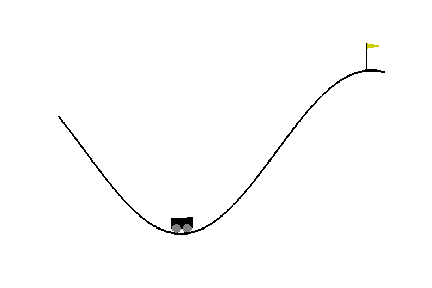
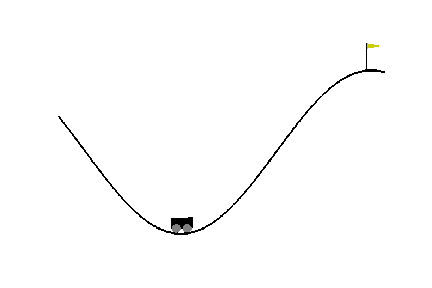
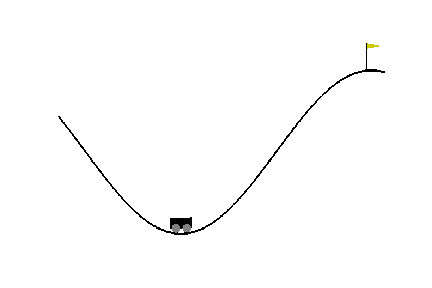
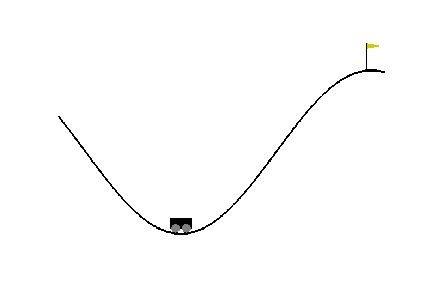
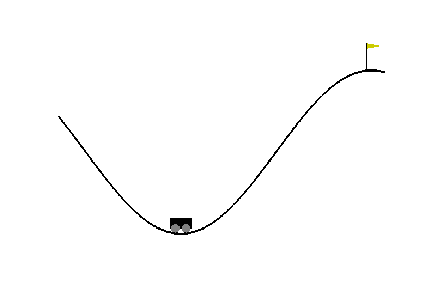
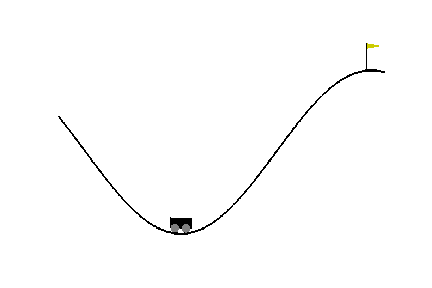
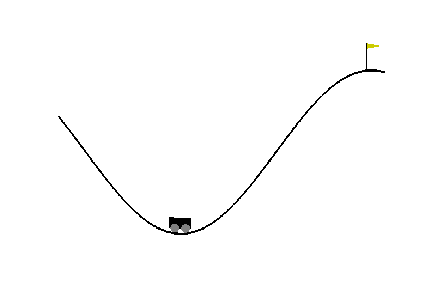
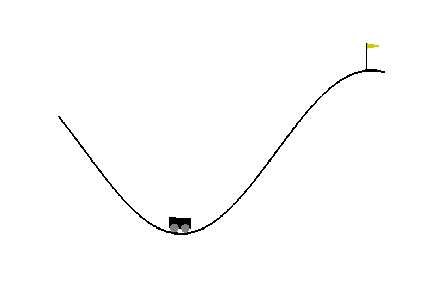
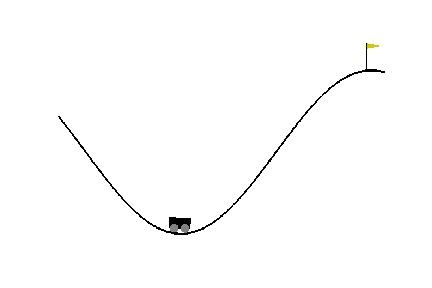
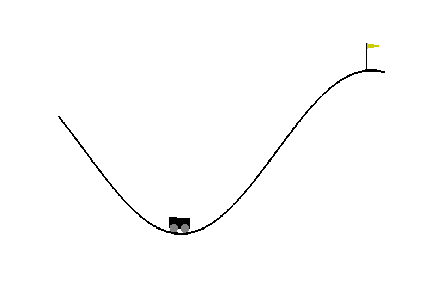
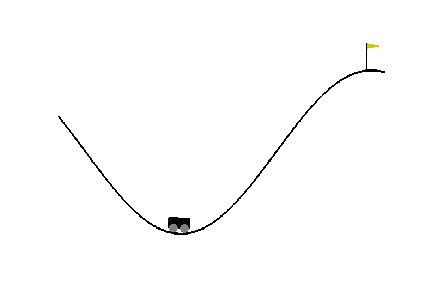
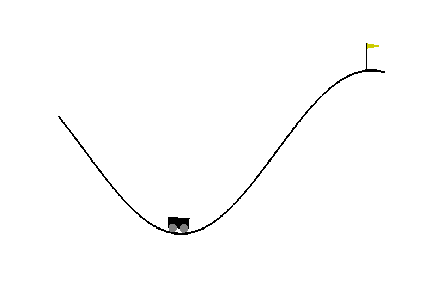
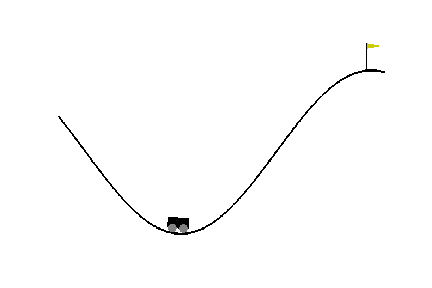
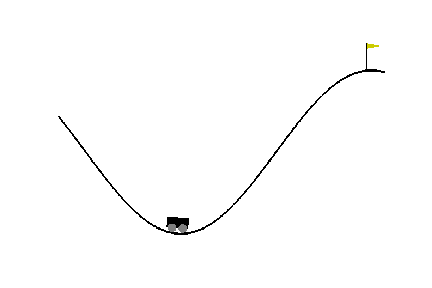
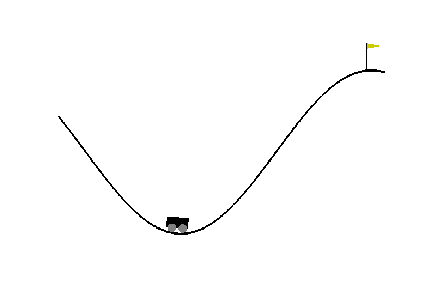
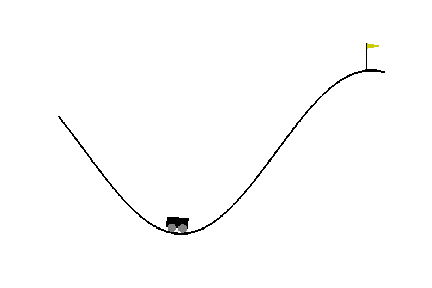
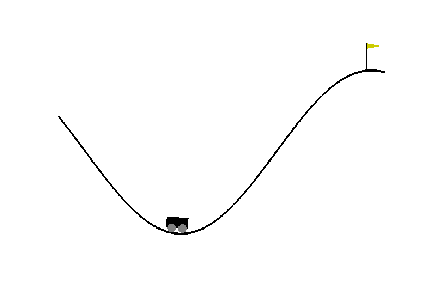
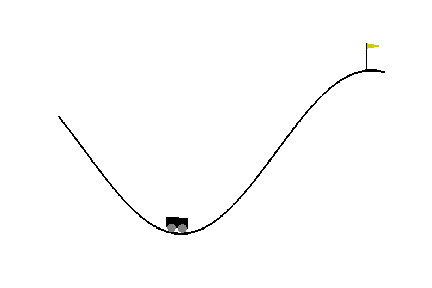
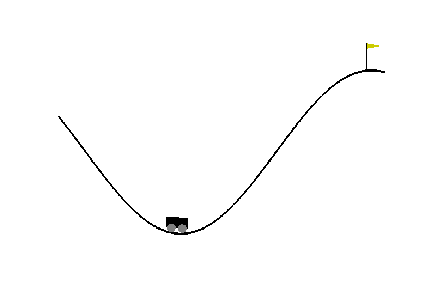
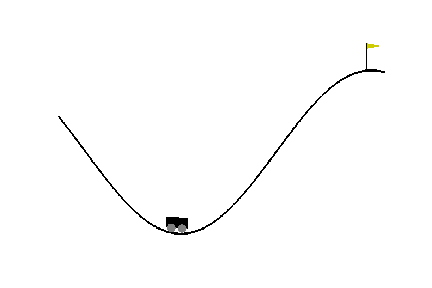
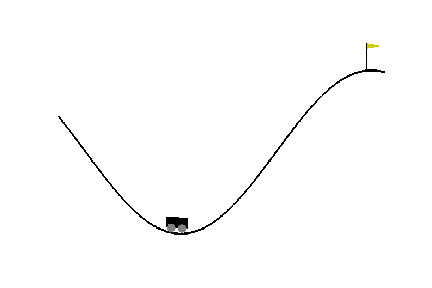
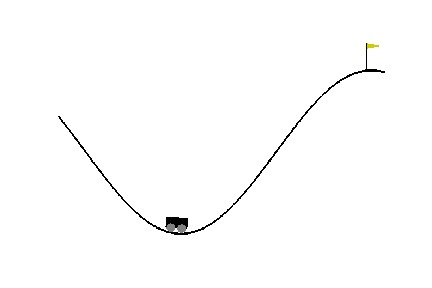
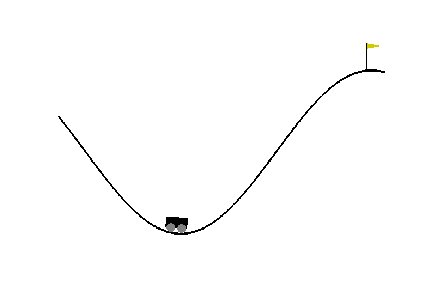
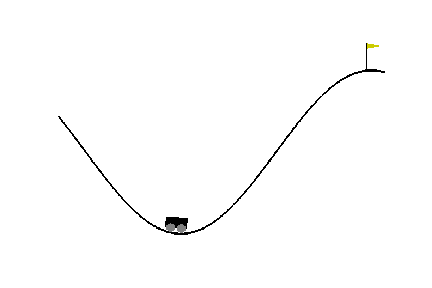
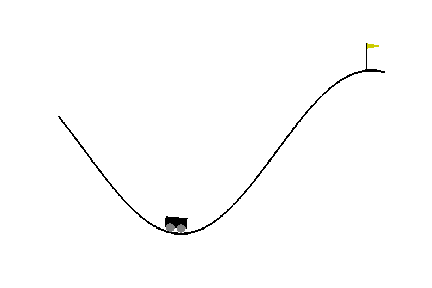
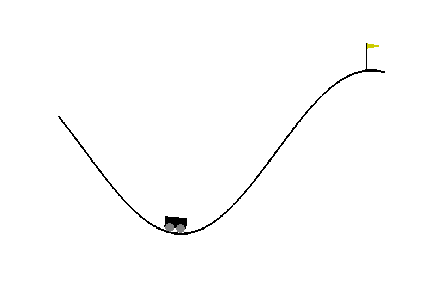
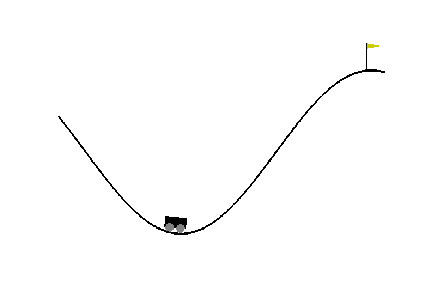
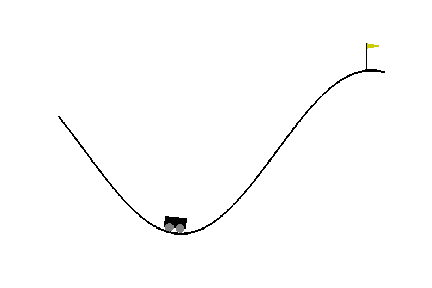
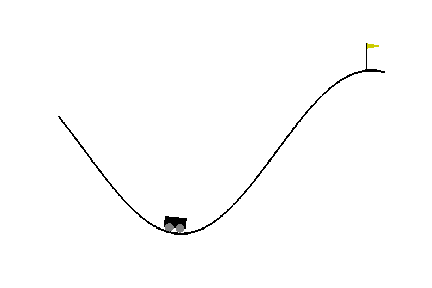
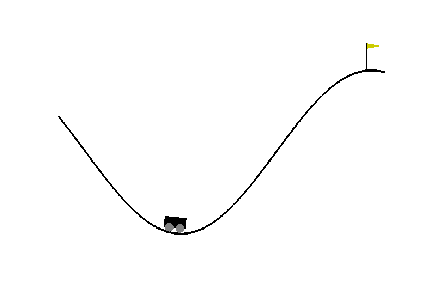
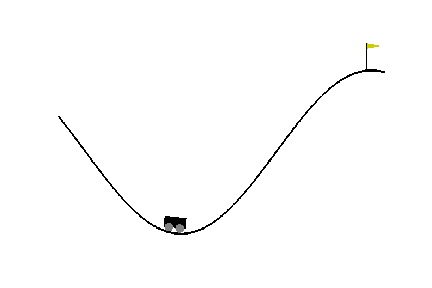
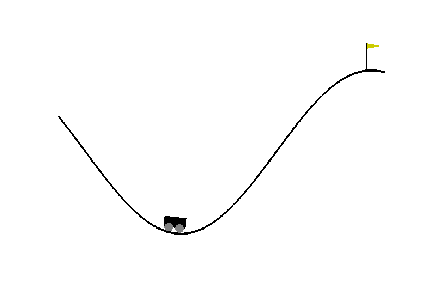
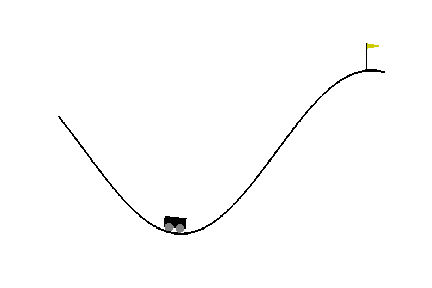
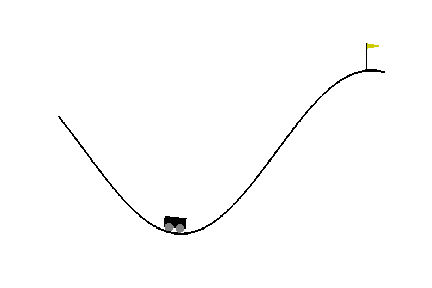
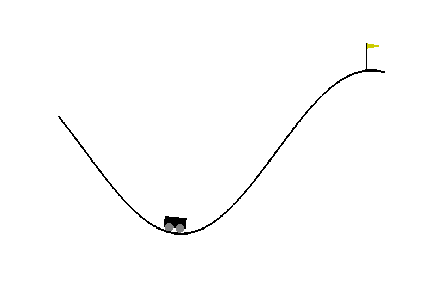
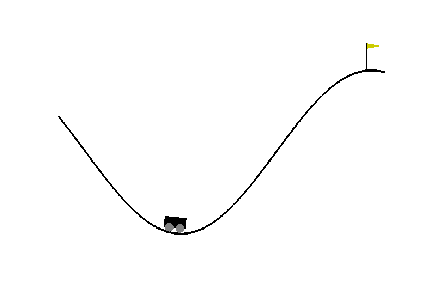
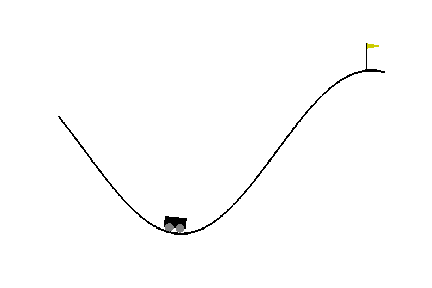
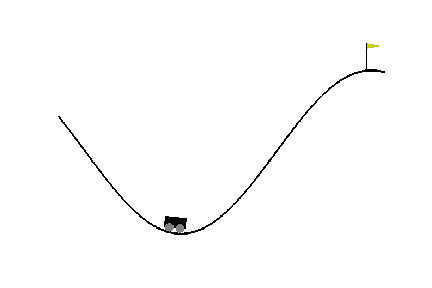
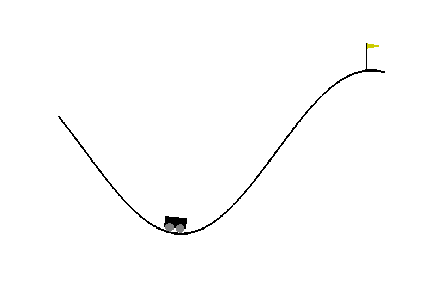
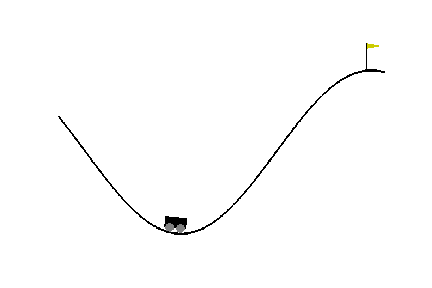
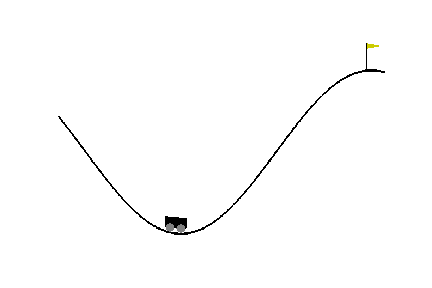
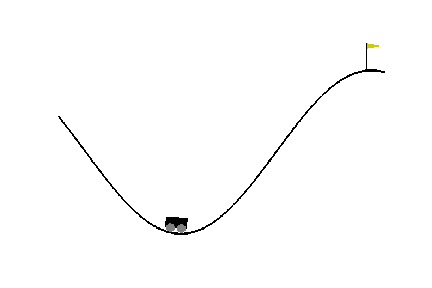
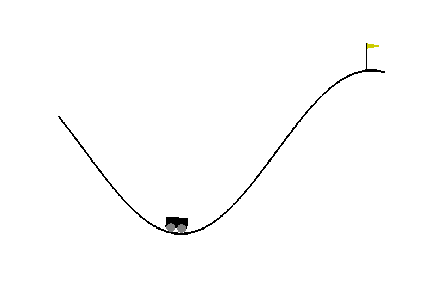
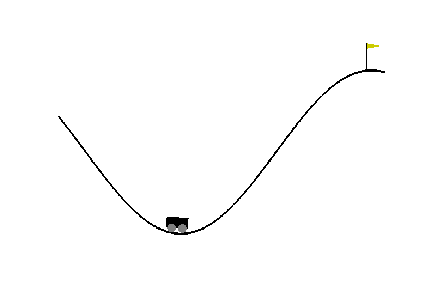
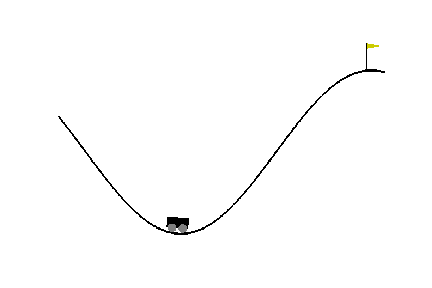
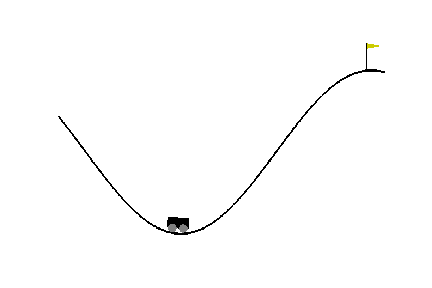
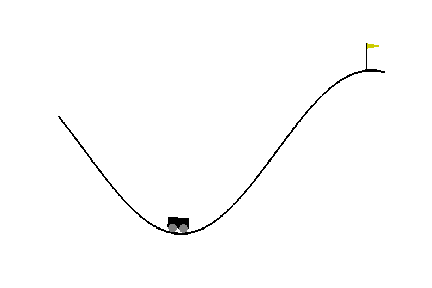
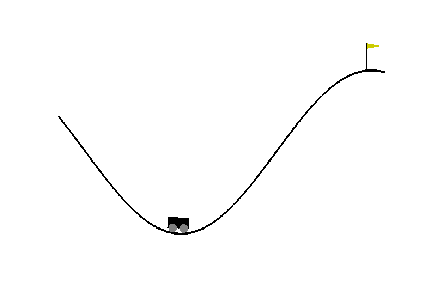
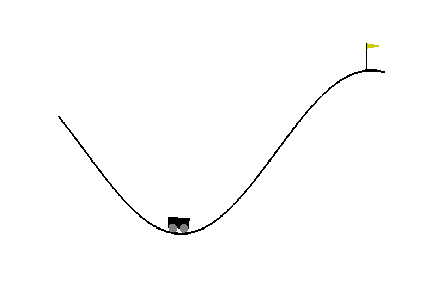
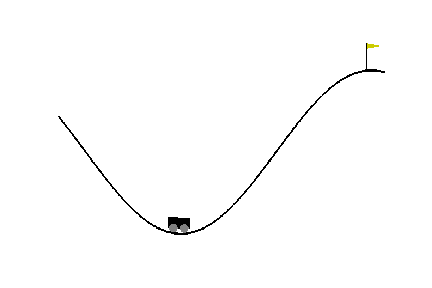
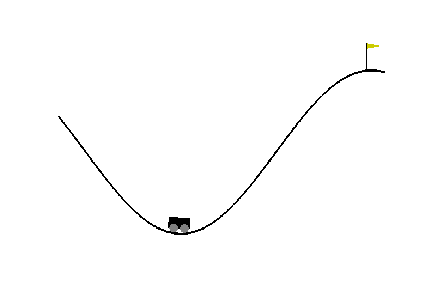
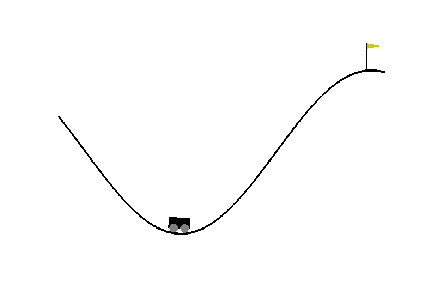
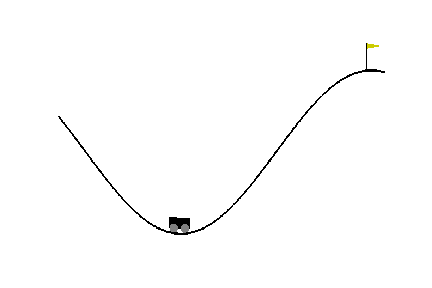
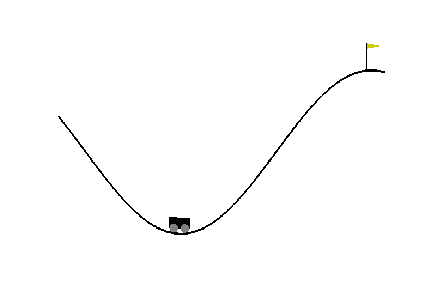
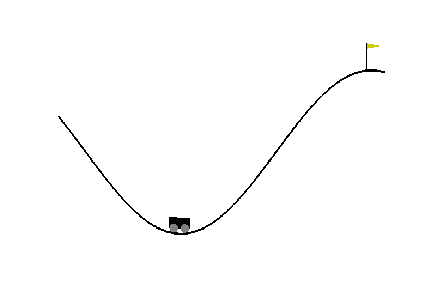
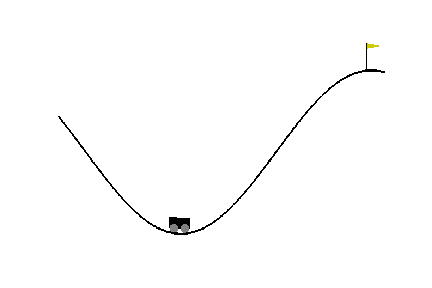
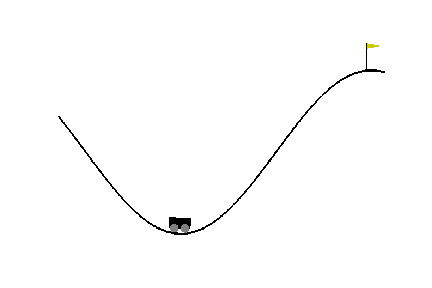
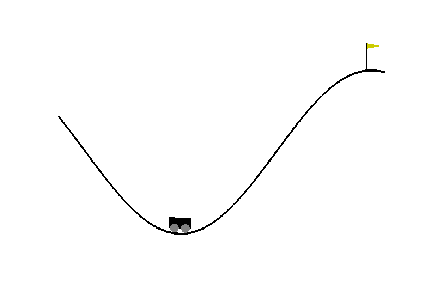
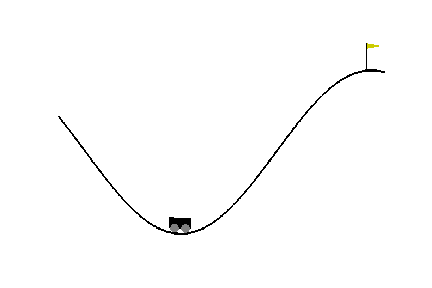
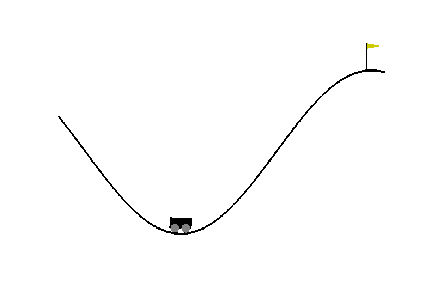
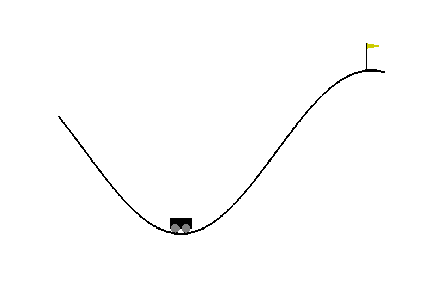
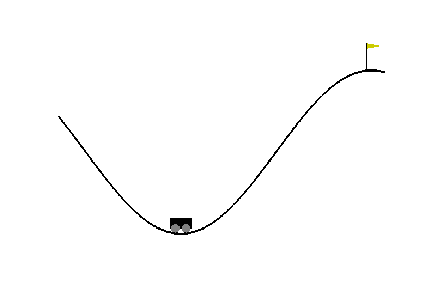
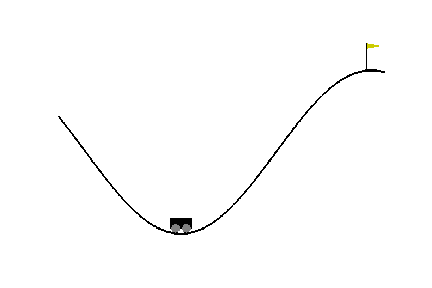
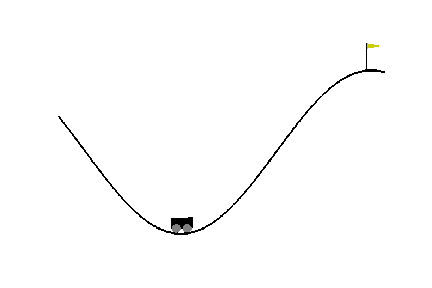
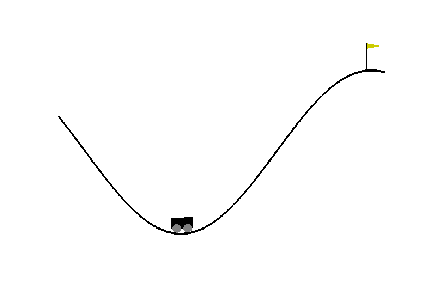
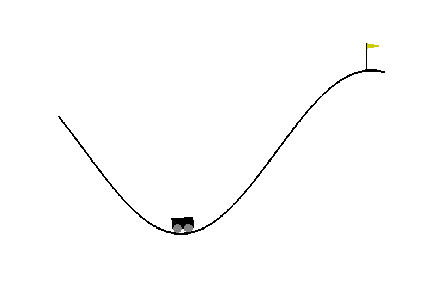
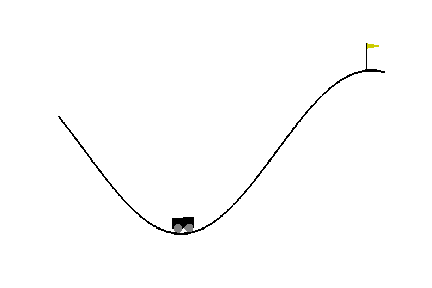
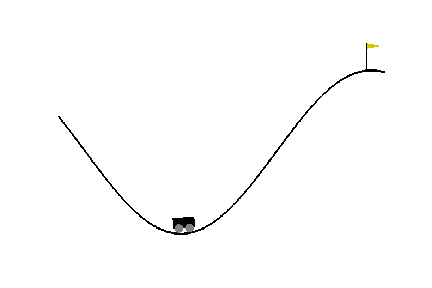
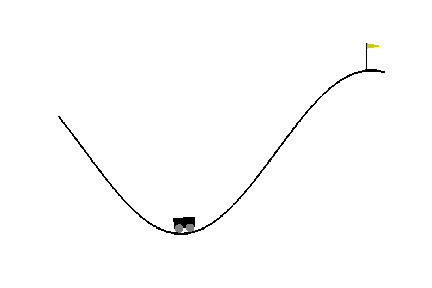
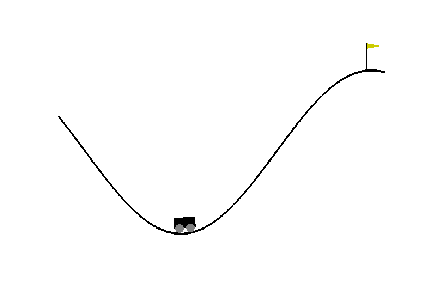
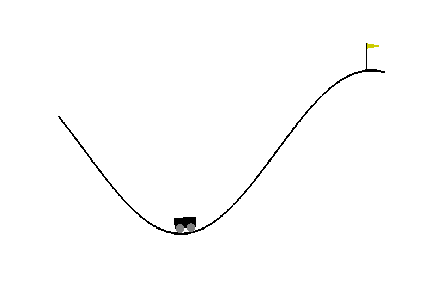
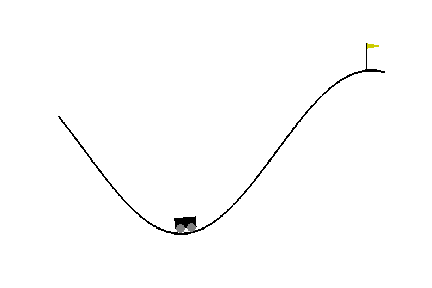
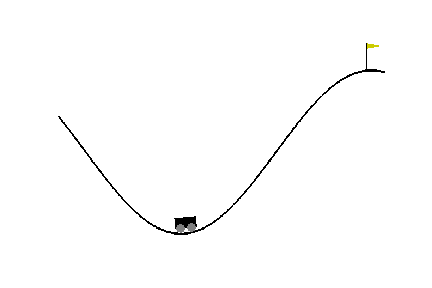
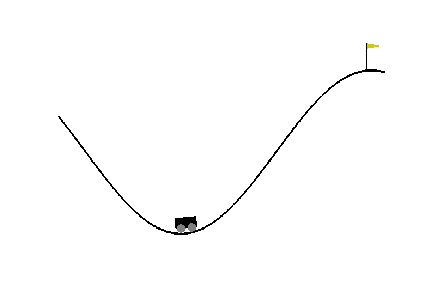
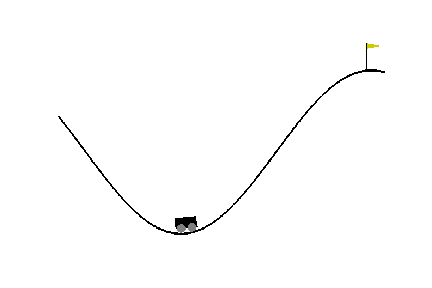
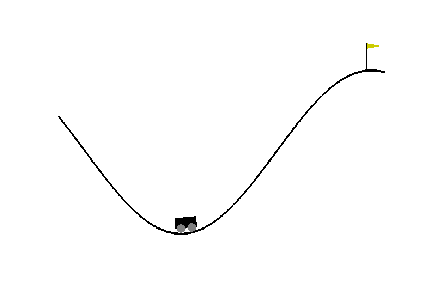
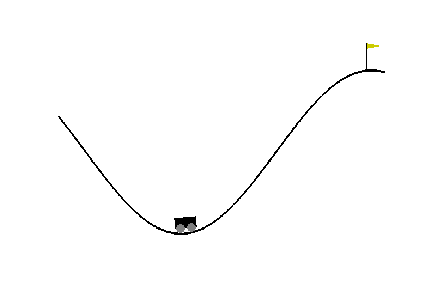
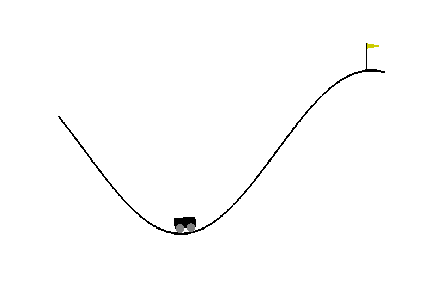
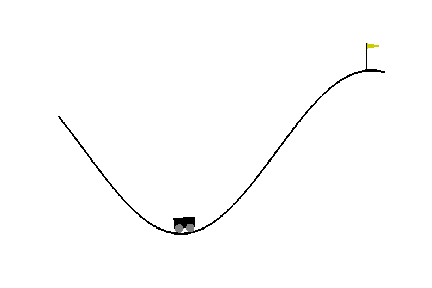
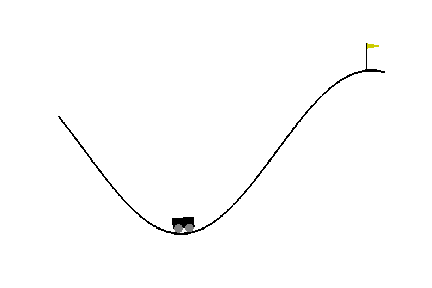
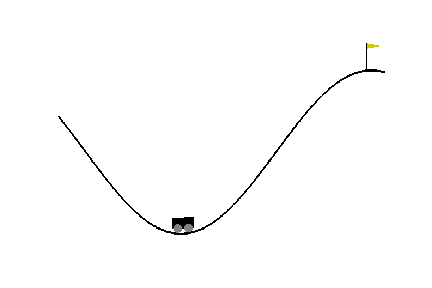
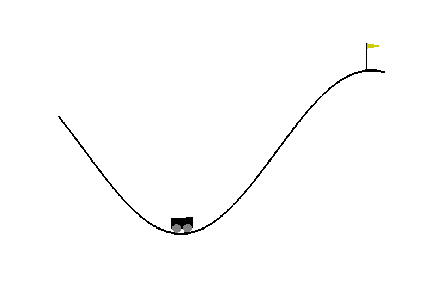
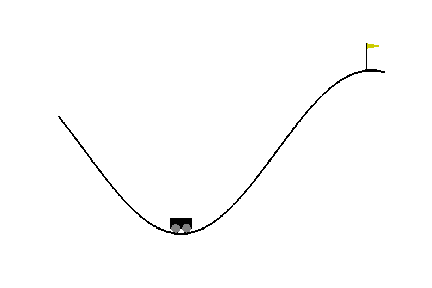
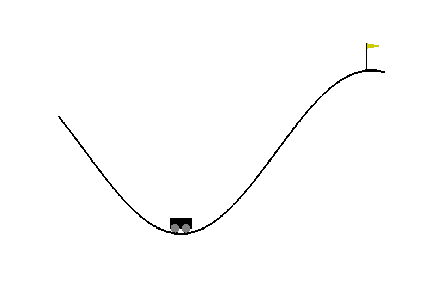
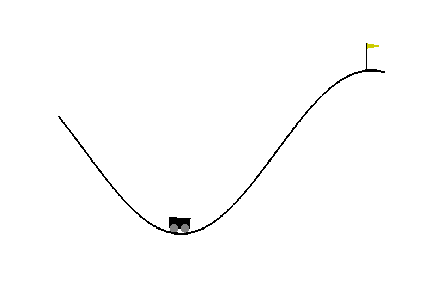
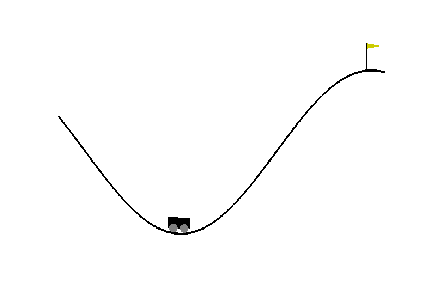
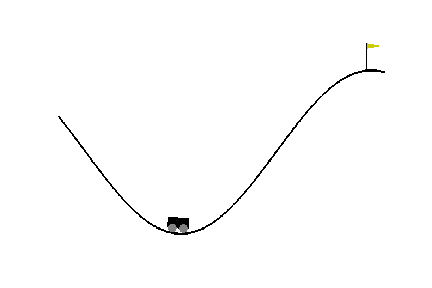
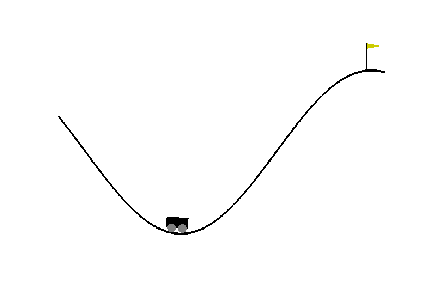
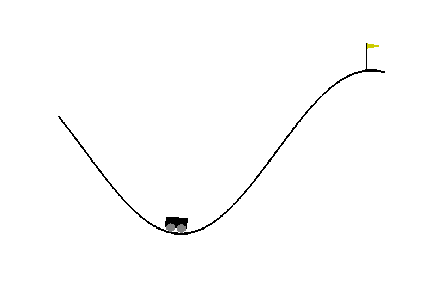
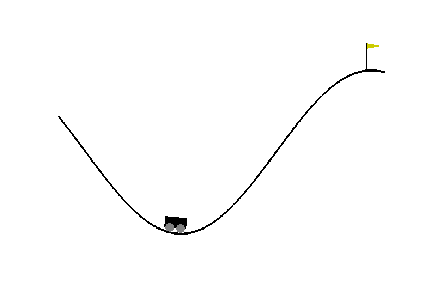
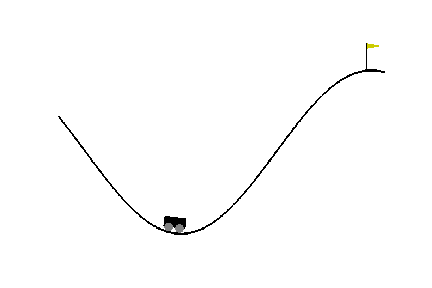
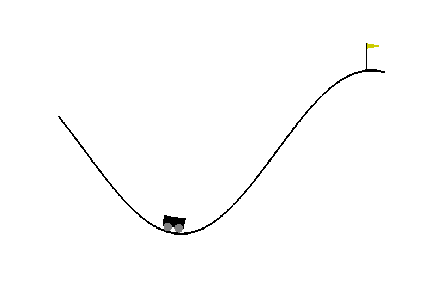
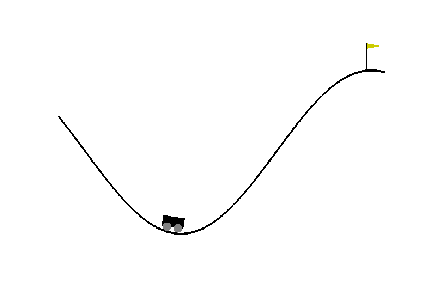
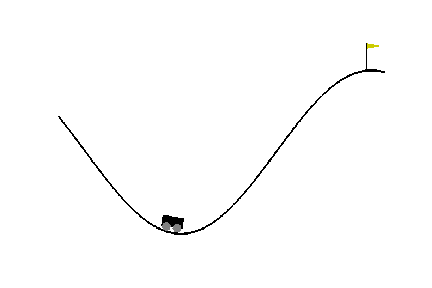
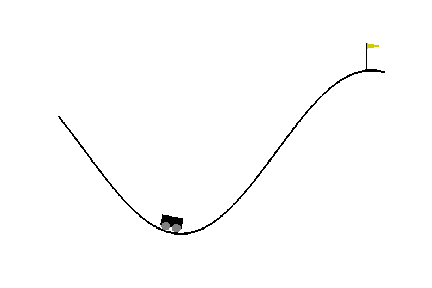
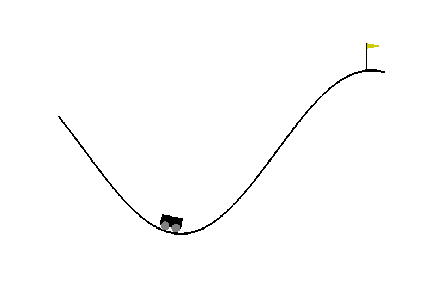
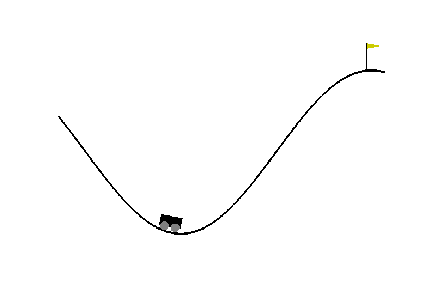
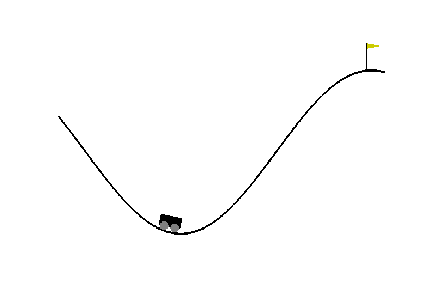
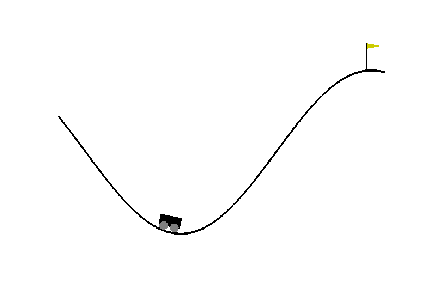
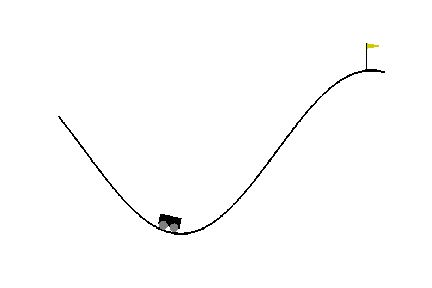
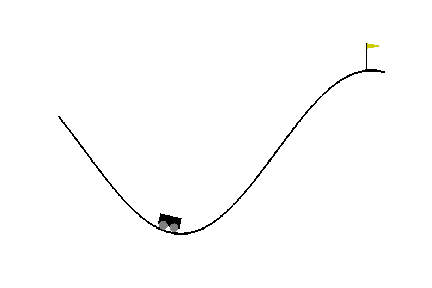
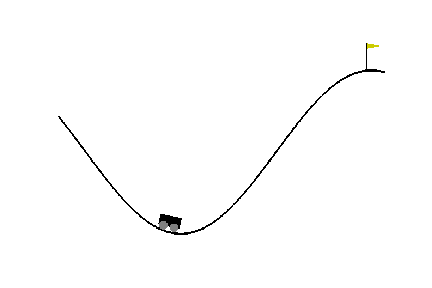
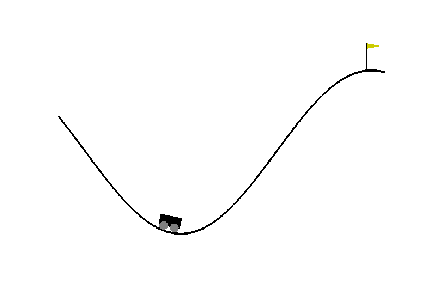
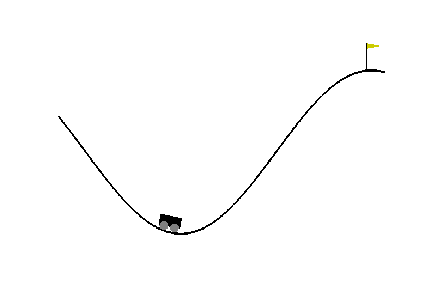
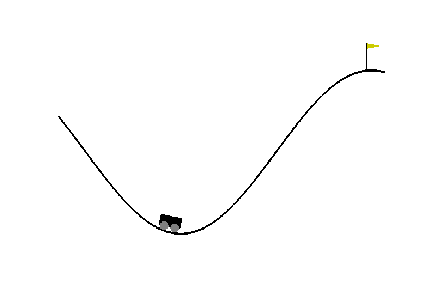
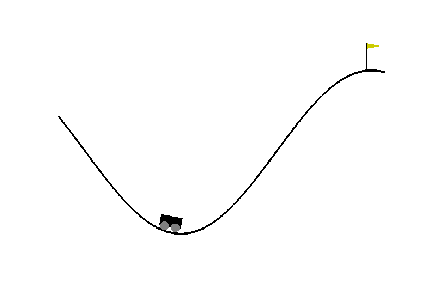
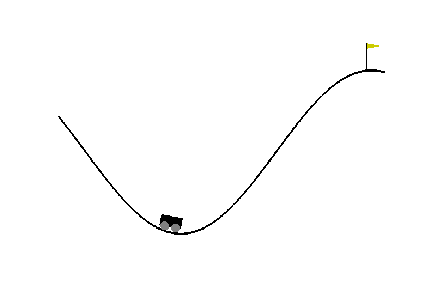
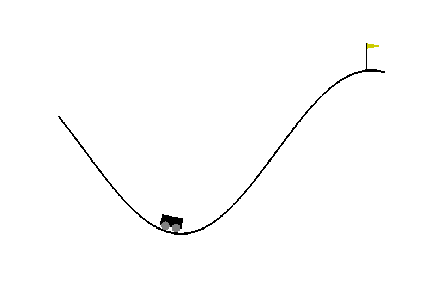
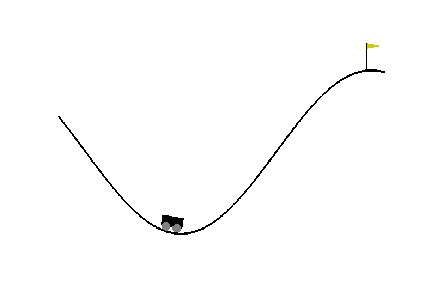
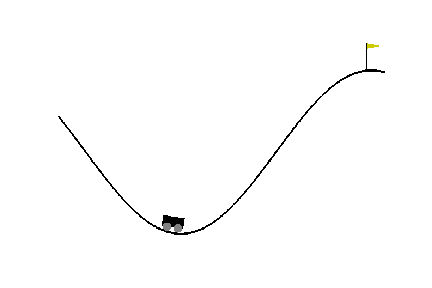
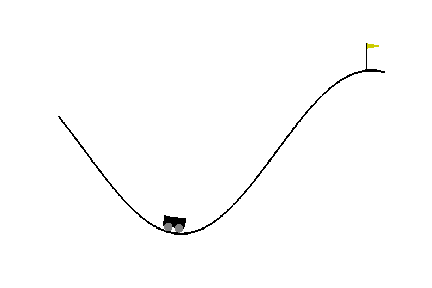
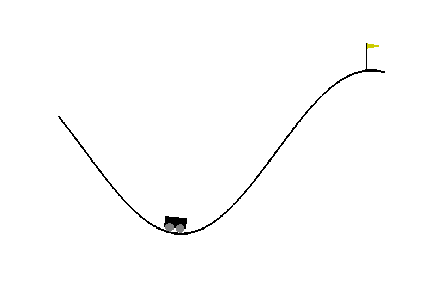
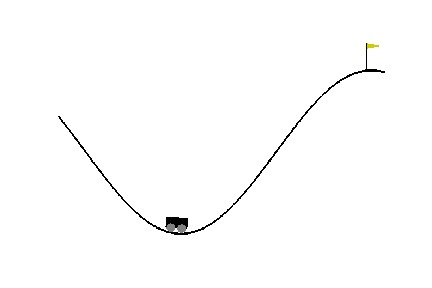
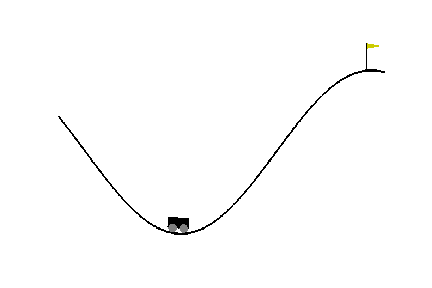
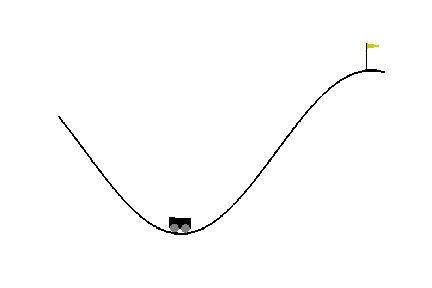
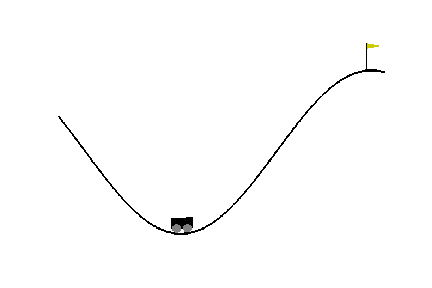
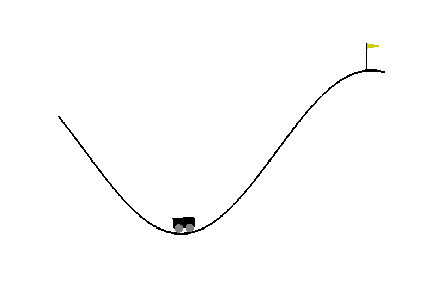
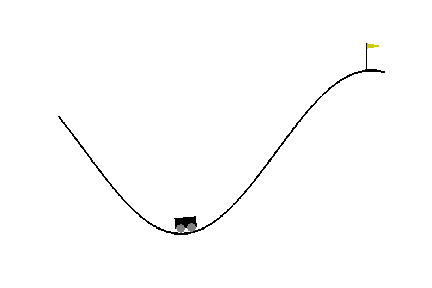
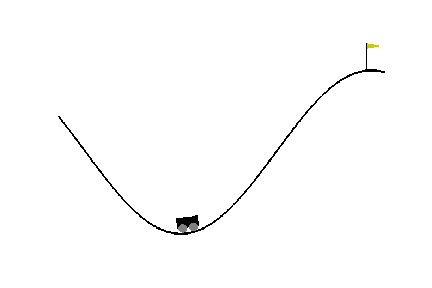
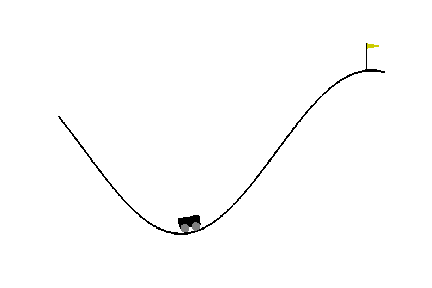
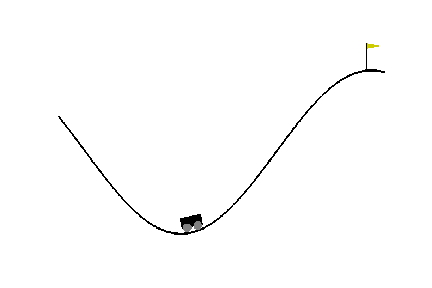
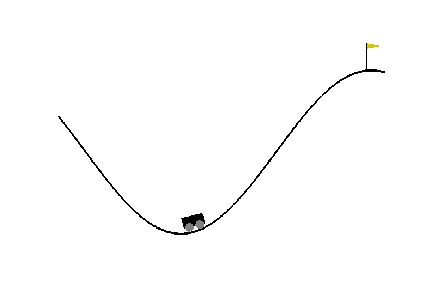
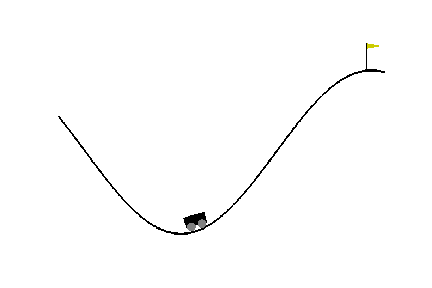
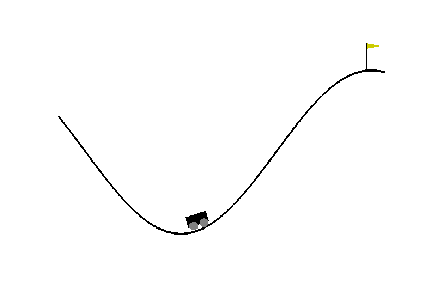
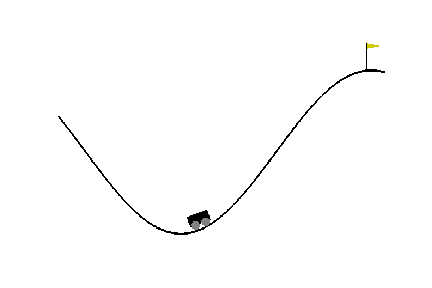
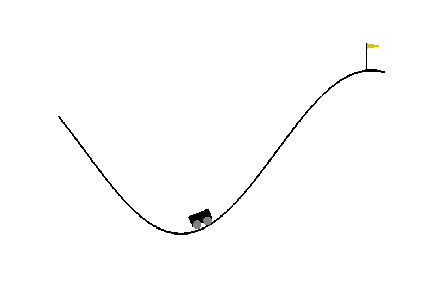
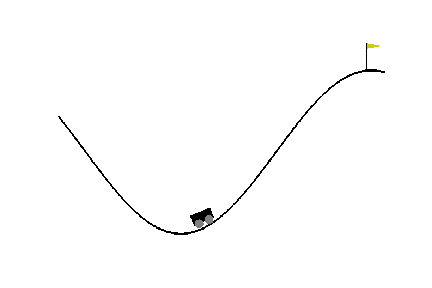
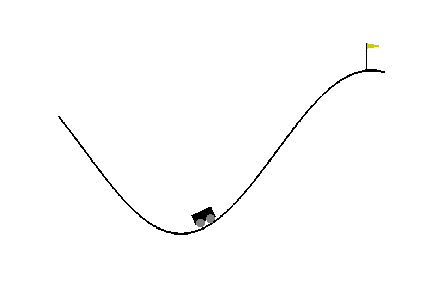
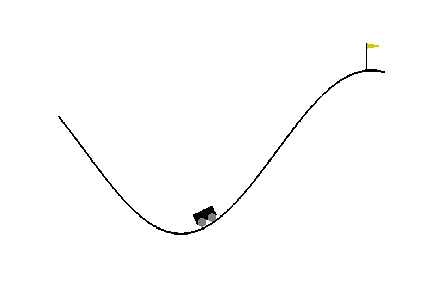
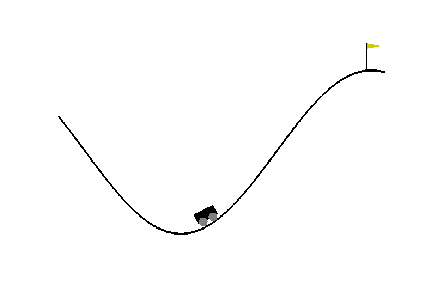
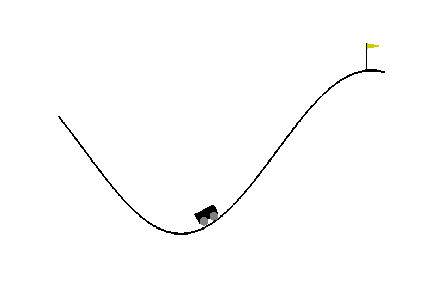
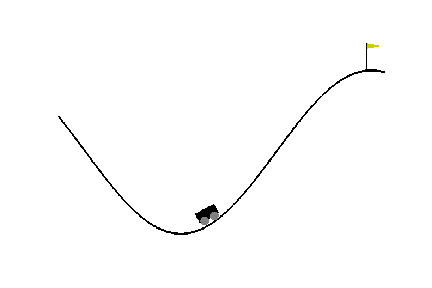
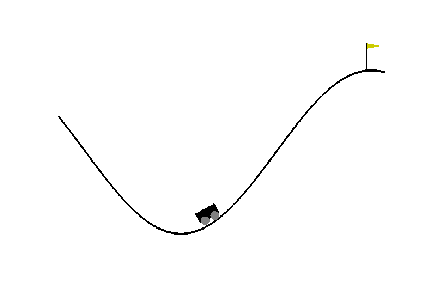
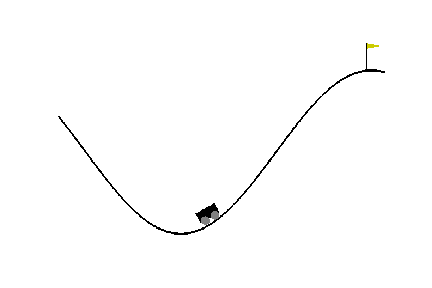
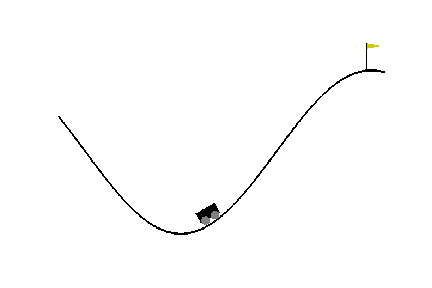
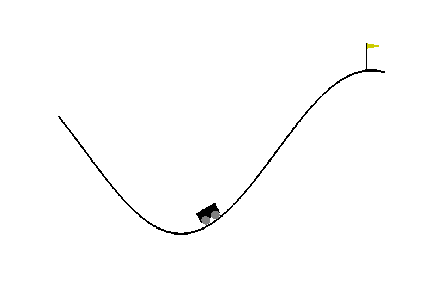
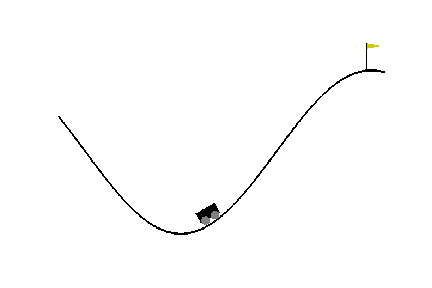
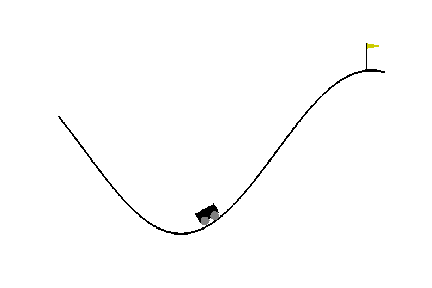
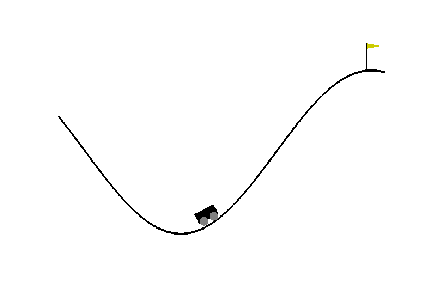
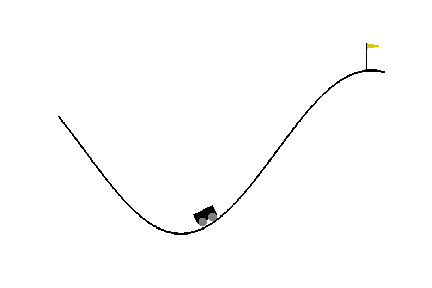
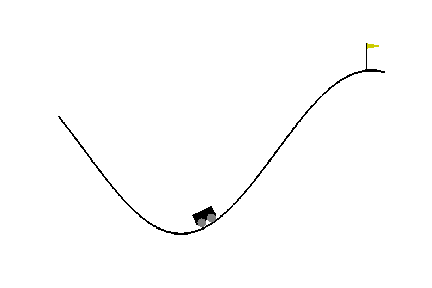
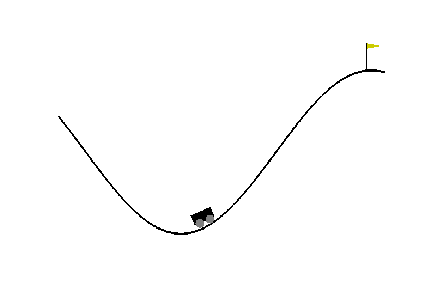
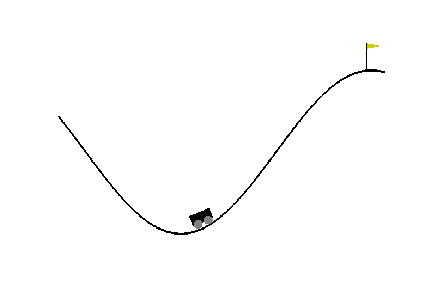
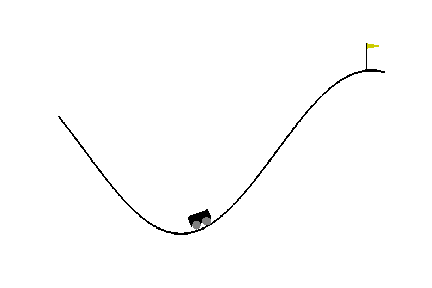
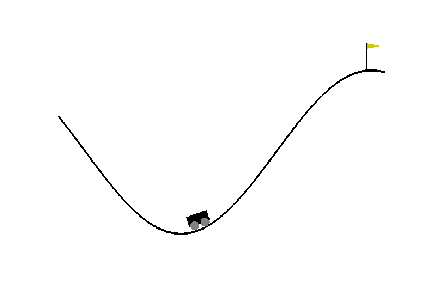
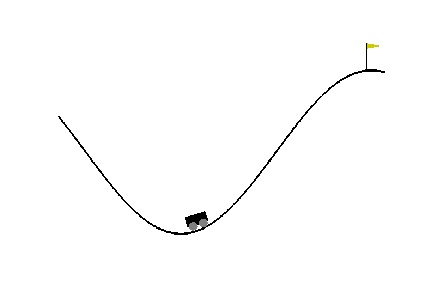
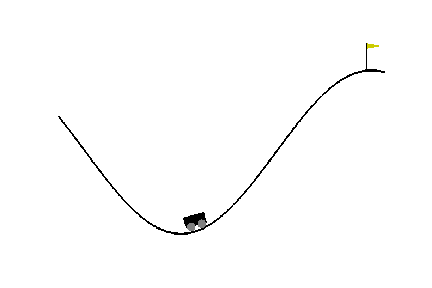
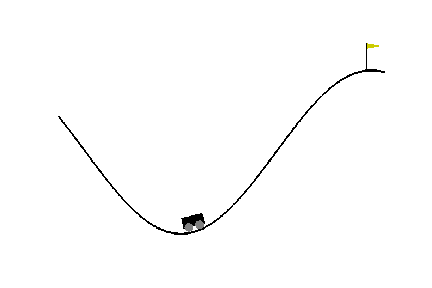
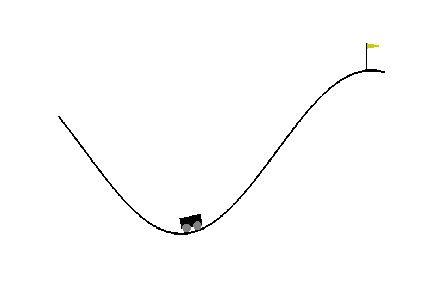
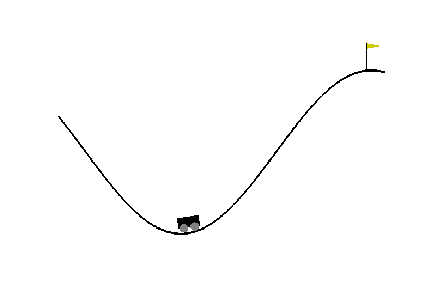
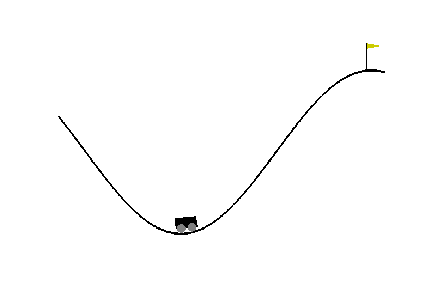
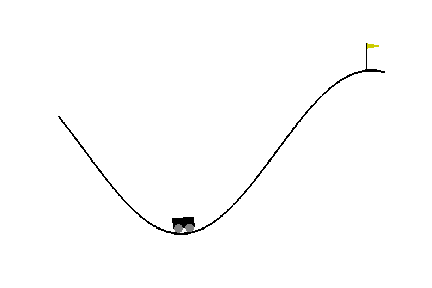
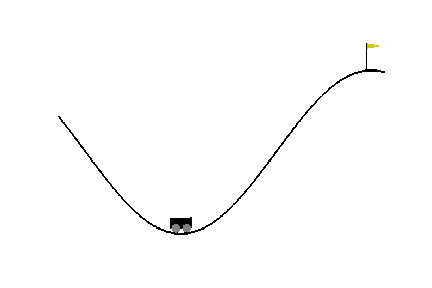
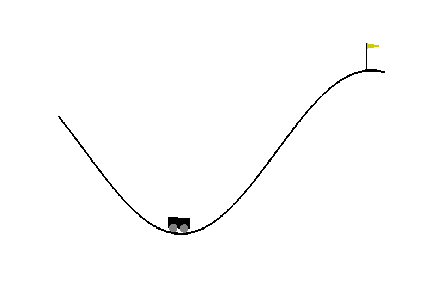
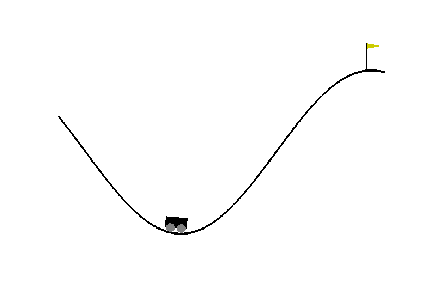
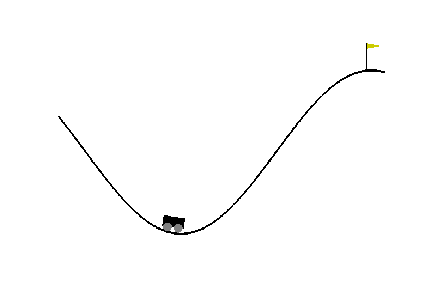
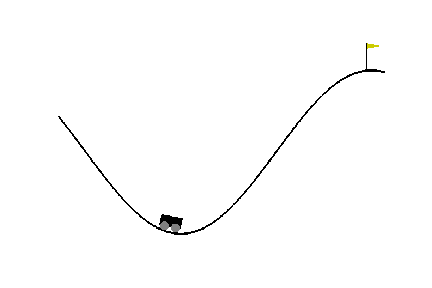
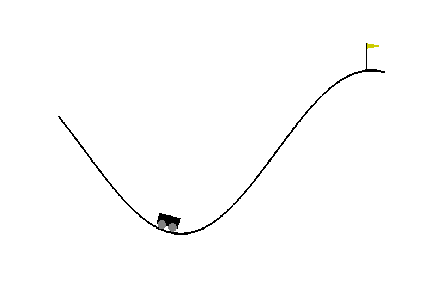
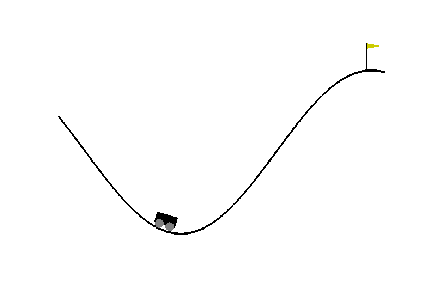
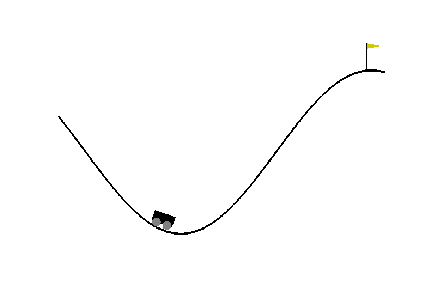
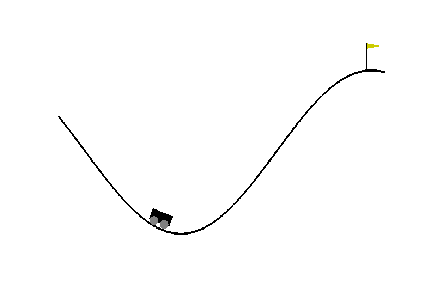
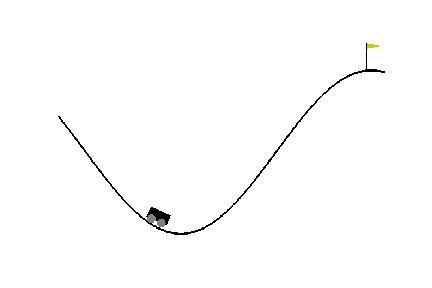
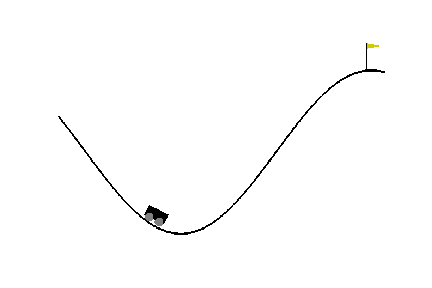
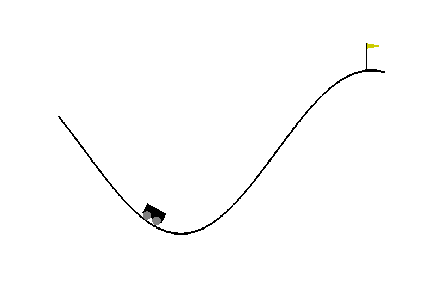
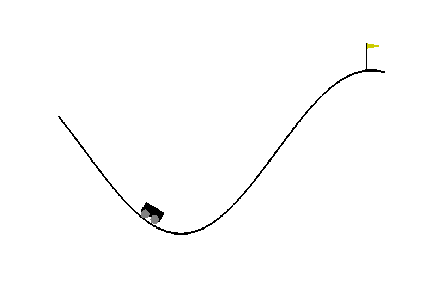
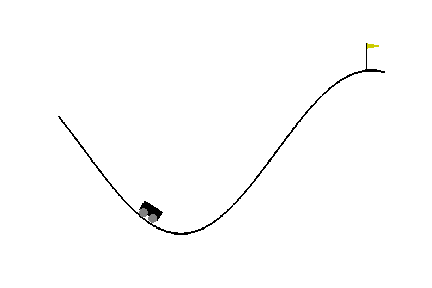
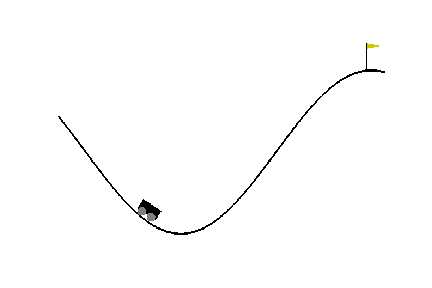
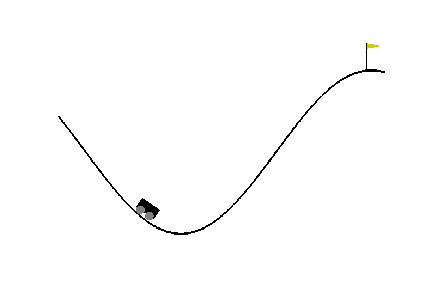
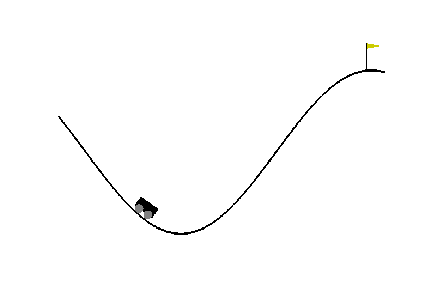
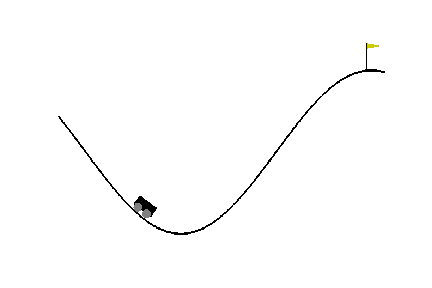
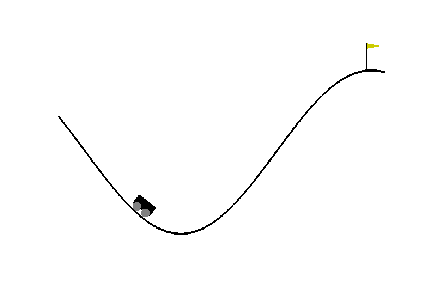
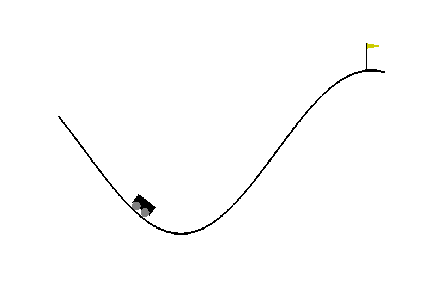
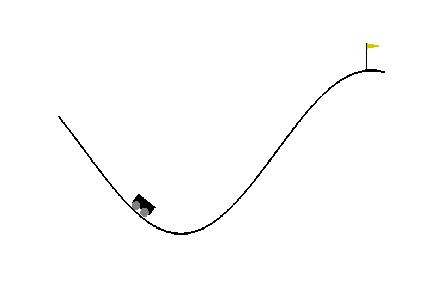
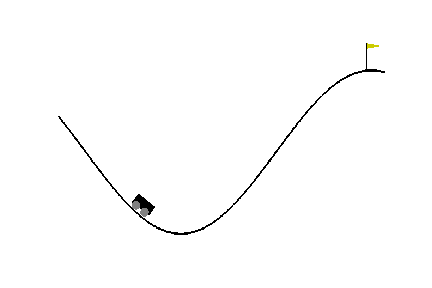
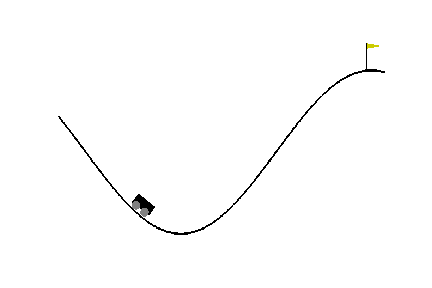
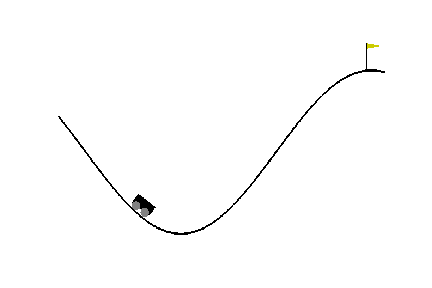
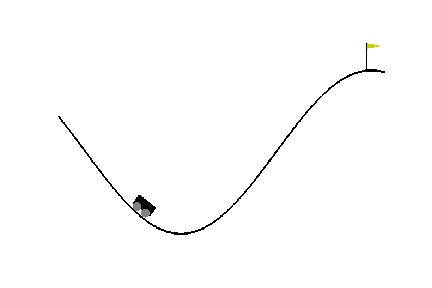
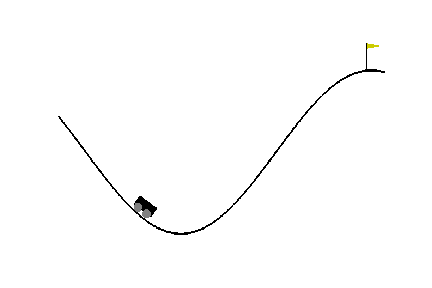
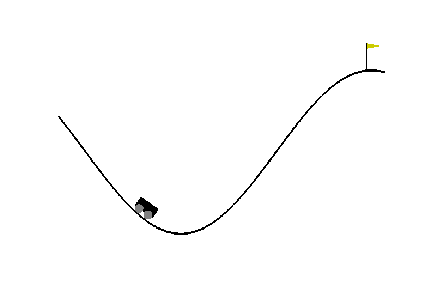
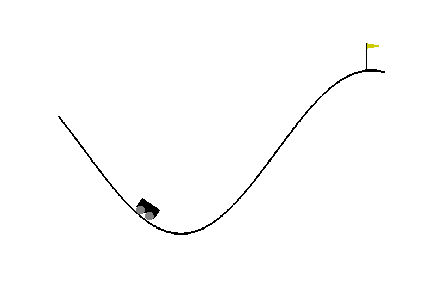
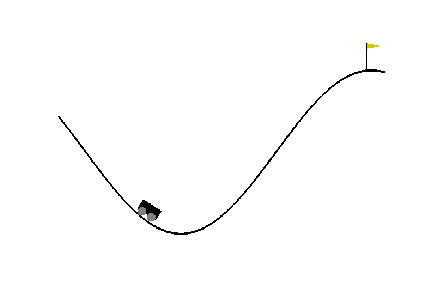
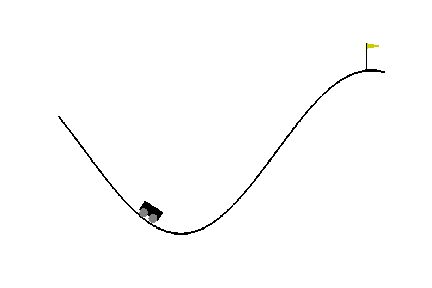
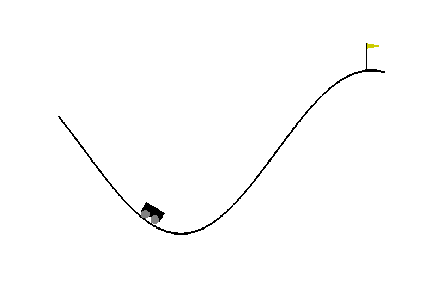
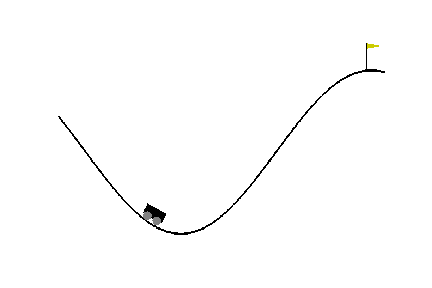
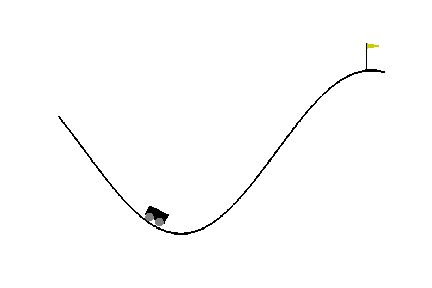
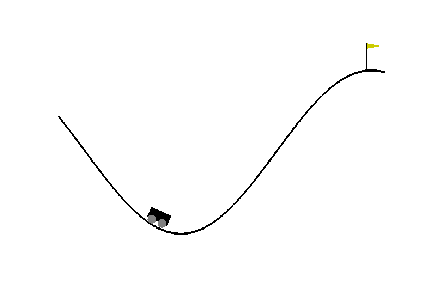
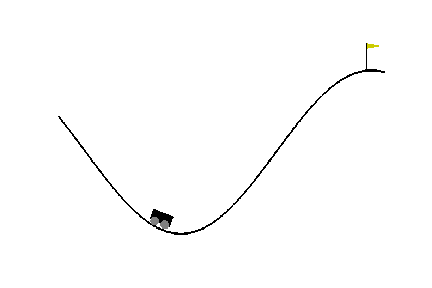
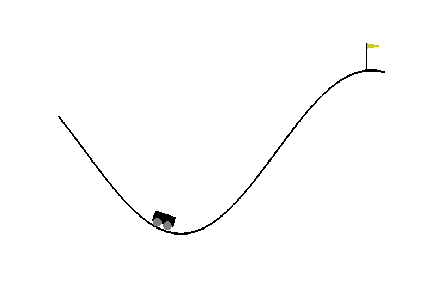
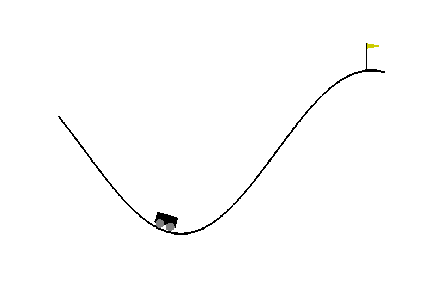
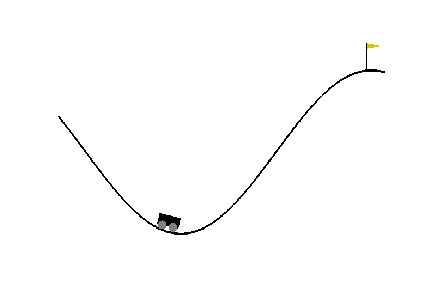
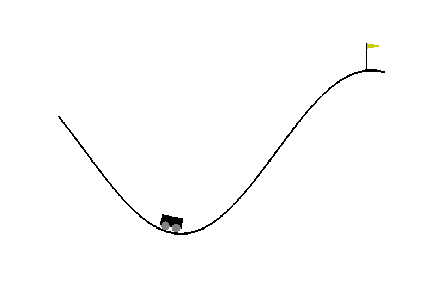
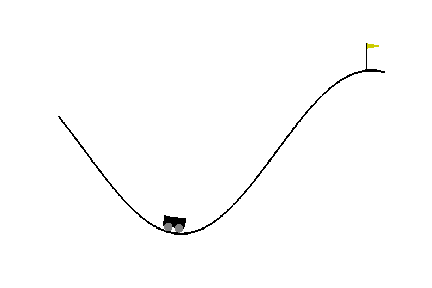
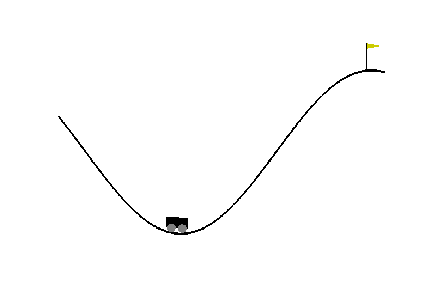
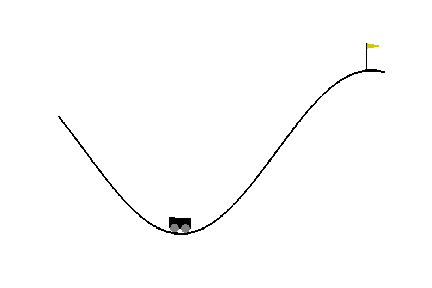
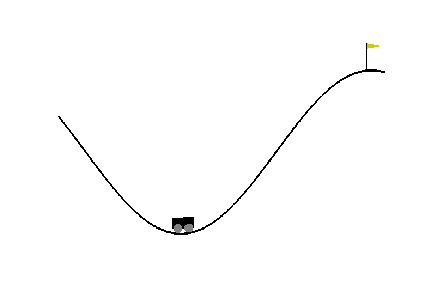
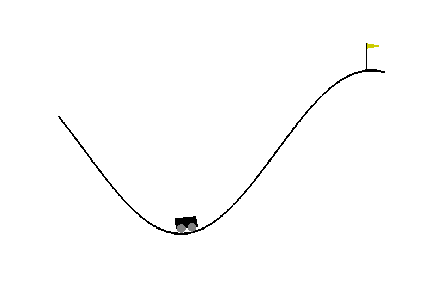
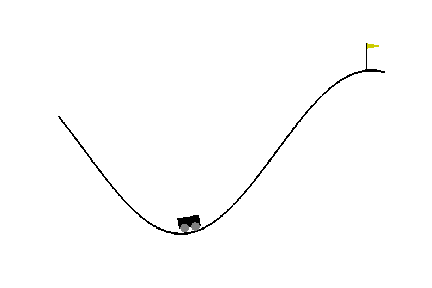
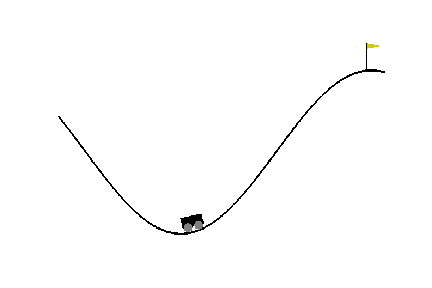
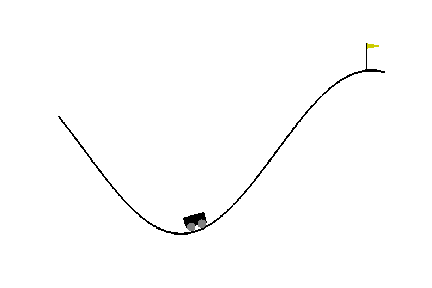
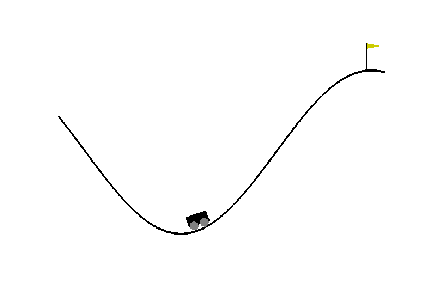

In [3]:
observation = env.reset()
cum_reward = 0
frames = []
for t in range(5000):
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    #print 'Observation: ', observation
    if done:
        print 'Number of step: ', t
        break
env.render(close=True)
helper.display_frames_as_gif(frames)  #<<< This one for Jupyter Notebook Display

In [4]:
state = env.observation_space
print 'Number of states:', state
print 'Number of available actions: ',env.action_space

Number of states: Box(2,)
Number of available actions:  Discrete(3)


** In previous project, we understand and figure our the effect of actions to the system. In fact, in term of reinforcement learning, We do not need to know them anymore**

RBF Model for Q learning algorithm:

In [5]:
env.action_space.n

3

In [6]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDRegressor

Feature transformer based on RBF kernel

In [7]:
observation_examples = np.array([env.observation_space.sample() for x in range(10000)])
#observation_examples = observation_examples.reshape(1,-1)
scaler = StandardScaler()
scaler.fit(observation_examples)

featurizer = FeatureUnion([
            ("rbf1", RBFSampler(gamma=5.0, n_components=500)),
            ("rbf2", RBFSampler(gamma=2.0, n_components=500)),
            ("rbf3", RBFSampler(gamma=1.0, n_components=500)),
            ("rbf4", RBFSampler(gamma=0.5, n_components=500))
            ])
featurizer.fit(scaler.transform(observation_examples))
def FeatureTransform(feature):
    #feature = feature.reshape(1,-1)
    #example_features = featurizer.fit_transform(scaler.transform(observation_examples))
    return featurizer.transform(scaler.transform(feature))
    #return scaler.transform(feature)

In [8]:
#Since we have 3 actions available, we can have 3 models
#learning_rate = 'constant'
gamma = 0.99
models = []
for i in range(env.action_space.n):
    model = SGDRegressor(learning_rate='constant')
    model.partial_fit(FeatureTransform([env.reset()]), [0])
    models.append(model)

In [9]:
for i in range(3):
    print len(models[i].coef_)

2000
2000
2000


In [10]:
def predict(state):
    transformed_feature = FeatureTransform([state])
    return np.array([models[i].predict(transformed_feature)[0] for i in range(3)])

In [11]:
predict(env.reset())

array([ 0.,  0.,  0.])

In [13]:
def next_action(state, eps):
    if np.random.random() < eps:
        return env.action_space.sample()
    else:
        return np.argmax(predict(state))

In [13]:
gamma = 0.99
for i in range (300): # We play 1000 episodes
    done = False
    s = env.reset()
    time = 0 #keep track how long
    total_reward = 0
    eps = (0.97**i)
    while not done:
        action = next_action(s, eps) # Whatever it can be, because Q learning is an off-policy learning algorithms
        s_landed, reward, done,info = env.step(action)
        time = time + 1
        #Q =  gamma*max_action(s_landed)
        Q = gamma*np.max(predict(s_landed)[0])
        G = reward + Q
        models[action].partial_fit(FeatureTransform([s]), [G])
        s = s_landed
        total_reward += reward
    print 'Finish episode #', i, 'time is: ', time, 'reward is: ', total_reward
    

Finish episode # 0 time is:  200 reward is:  -200.0
Finish episode # 1 time is:  200 reward is:  -200.0
Finish episode # 2 time is:  200 reward is:  -200.0
Finish episode # 3 time is:  200 reward is:  -200.0
Finish episode # 4 time is:  200 reward is:  -200.0
Finish episode # 5 time is:  200 reward is:  -200.0
Finish episode # 6 time is:  200 reward is:  -200.0
Finish episode # 7 time is:  200 reward is:  -200.0
Finish episode # 8 time is:  200 reward is:  -200.0
Finish episode # 9 time is:  200 reward is:  -200.0
Finish episode # 10 time is:  200 reward is:  -200.0
Finish episode # 11 time is:  200 reward is:  -200.0
Finish episode # 12 time is:  200 reward is:  -200.0
Finish episode # 13 time is:  200 reward is:  -200.0
Finish episode # 14 time is:  200 reward is:  -200.0
Finish episode # 15 time is:  200 reward is:  -200.0
Finish episode # 16 time is:  200 reward is:  -200.0
Finish episode # 17 time is:  200 reward is:  -200.0
Finish episode # 18 time is:  200 reward is:  -200.0
Fin

Finish episode # 154 time is:  152 reward is:  -152.0
Finish episode # 155 time is:  160 reward is:  -160.0
Finish episode # 156 time is:  142 reward is:  -142.0
Finish episode # 157 time is:  145 reward is:  -145.0
Finish episode # 158 time is:  147 reward is:  -147.0
Finish episode # 159 time is:  141 reward is:  -141.0
Finish episode # 160 time is:  148 reward is:  -148.0
Finish episode # 161 time is:  148 reward is:  -148.0
Finish episode # 162 time is:  153 reward is:  -153.0
Finish episode # 163 time is:  164 reward is:  -164.0
Finish episode # 164 time is:  169 reward is:  -169.0
Finish episode # 165 time is:  146 reward is:  -146.0
Finish episode # 166 time is:  150 reward is:  -150.0
Finish episode # 167 time is:  149 reward is:  -149.0
Finish episode # 168 time is:  147 reward is:  -147.0
Finish episode # 169 time is:  148 reward is:  -148.0
Finish episode # 170 time is:  149 reward is:  -149.0
Finish episode # 171 time is:  143 reward is:  -143.0
Finish episode # 172 time is

In [18]:
#N Step estimator

gamma = 0.99
for i in range (300): # We play 1000 episodes
    done = False
    s = env.reset()
    time = 0 #keep track how long
    total_reward = 0
    eps = (0.97**i)
    while not done:
        action = next_action(s, eps) # Whatever it can be, because Q learning is an off-policy learning algorithms
        s_landed0, reward0, done,info = env.step(action)
        action = next_action(s_landed0, eps)
        s_landed1, reward1, done,info = env.step(action)
        time = time + 1
        #Q =  gamma*max_action(s_landed)
        Q = gamma*gamma*np.max(predict(s_landed1)[0])
        G = reward0 + gamma*reward1 + Q
        models[action].partial_fit(FeatureTransform([s]), [G])
        s = s_landed1
        total_reward += reward0 + reward1
    print 'Finish episode #', i, 'time is: ', time, 'reward is: ', total_reward
    

Finish episode # 0 time is:  100 reward is:  -200.0
Finish episode # 1 time is:  100 reward is:  -200.0
Finish episode # 2 time is:  100 reward is:  -200.0
Finish episode # 3 time is:  100 reward is:  -200.0
Finish episode # 4 time is:  100 reward is:  -200.0
Finish episode # 5 time is:  100 reward is:  -200.0
Finish episode # 6 time is:  100 reward is:  -200.0
Finish episode # 7 time is:  100 reward is:  -200.0
Finish episode # 8 time is:  100 reward is:  -200.0
Finish episode # 9 time is:  100 reward is:  -200.0
Finish episode # 10 time is:  100 reward is:  -200.0
Finish episode # 11 time is:  100 reward is:  -200.0
Finish episode # 12 time is:  100 reward is:  -200.0
Finish episode # 13 time is:  100 reward is:  -200.0
Finish episode # 14 time is:  100 reward is:  -200.0
Finish episode # 15 time is:  100 reward is:  -200.0
Finish episode # 16 time is:  100 reward is:  -200.0
Finish episode # 17 time is:  100 reward is:  -200.0
Finish episode # 18 time is:  100 reward is:  -200.0
Fin

Finish episode # 157 time is:  76 reward is:  -152.0
Finish episode # 158 time is:  70 reward is:  -140.0
Finish episode # 159 time is:  72 reward is:  -144.0
Finish episode # 160 time is:  73 reward is:  -146.0
Finish episode # 161 time is:  43 reward is:  -86.0
Finish episode # 162 time is:  44 reward is:  -88.0
Finish episode # 163 time is:  43 reward is:  -86.0
Finish episode # 164 time is:  78 reward is:  -156.0
Finish episode # 165 time is:  70 reward is:  -140.0
Finish episode # 166 time is:  80 reward is:  -160.0
Finish episode # 167 time is:  68 reward is:  -136.0
Finish episode # 168 time is:  69 reward is:  -138.0
Finish episode # 169 time is:  70 reward is:  -140.0
Finish episode # 170 time is:  74 reward is:  -148.0
Finish episode # 171 time is:  72 reward is:  -144.0
Finish episode # 172 time is:  78 reward is:  -156.0
Finish episode # 173 time is:  79 reward is:  -158.0
Finish episode # 174 time is:  70 reward is:  -140.0
Finish episode # 175 time is:  69 reward is:  -13

Number of step:  86



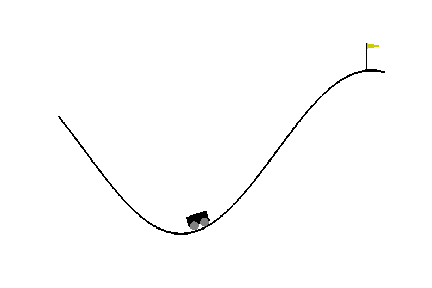
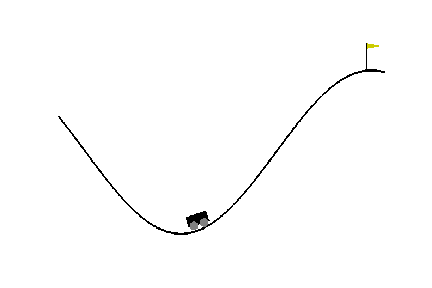
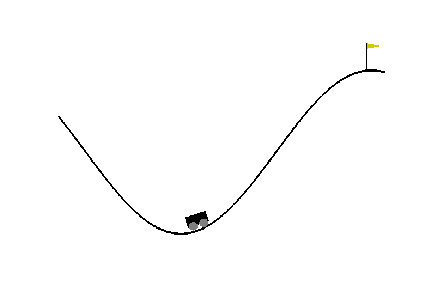
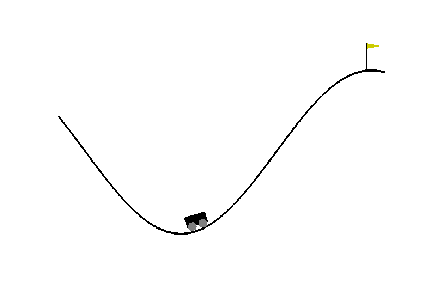
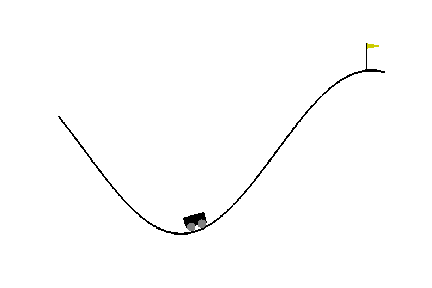
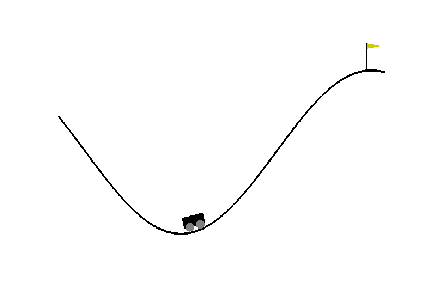
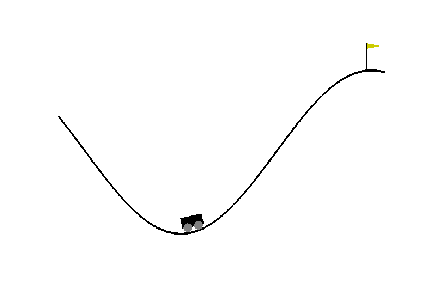
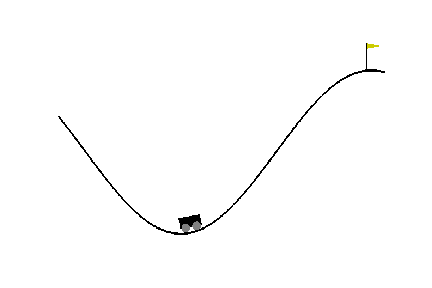
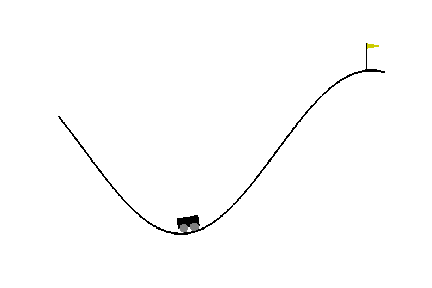
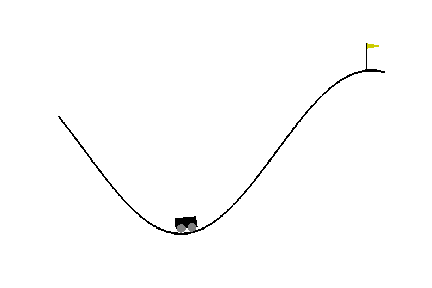
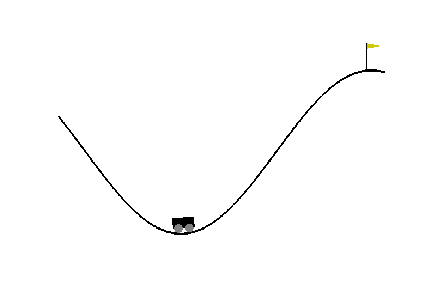
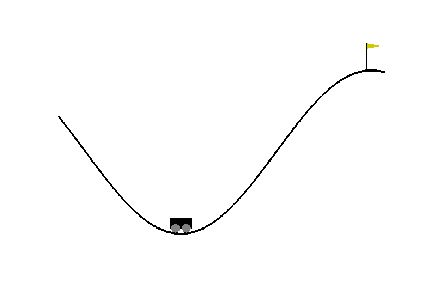
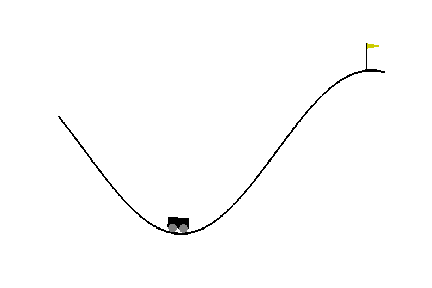
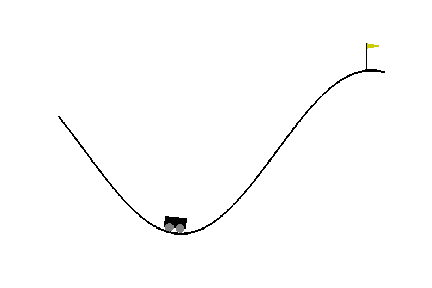
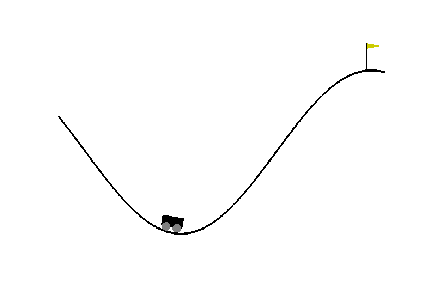
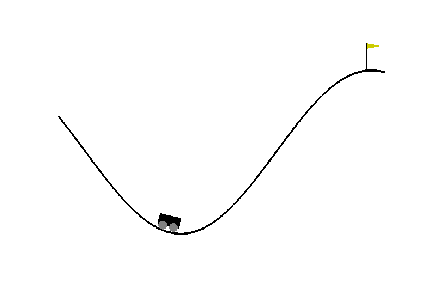
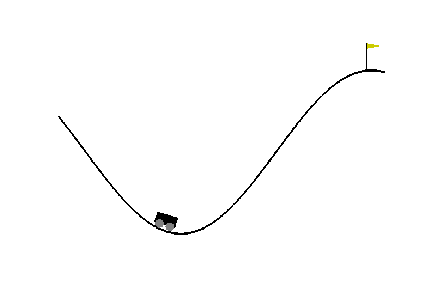
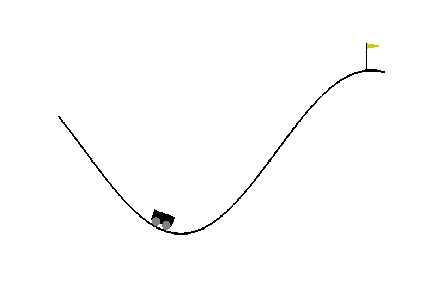
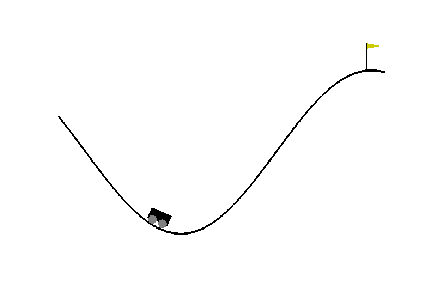
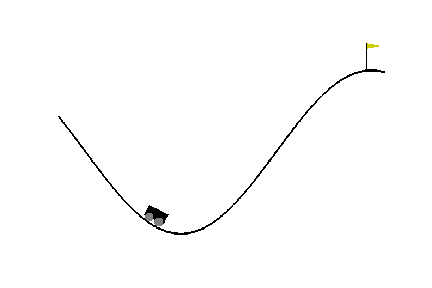
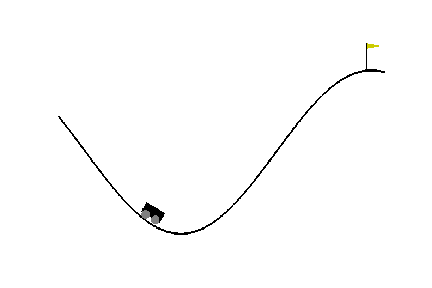
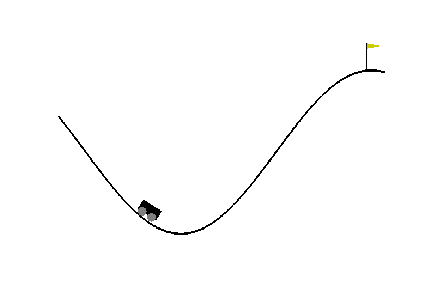
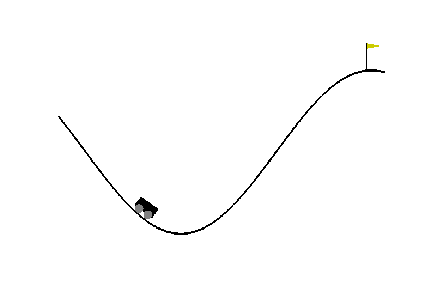
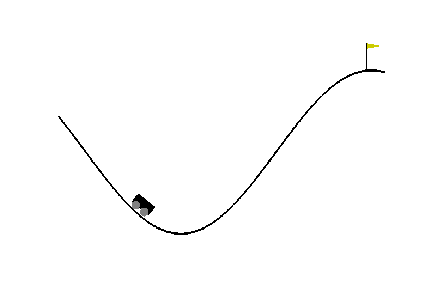
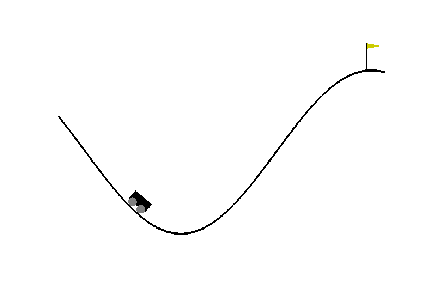
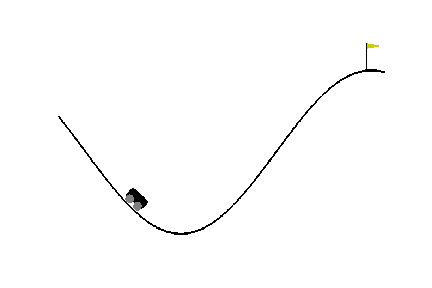
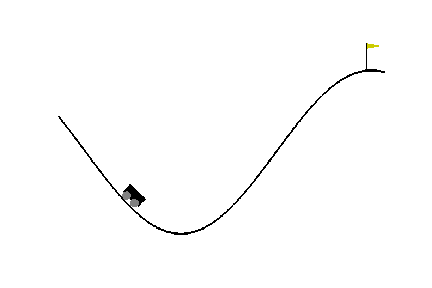
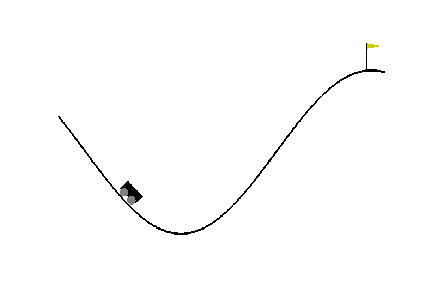
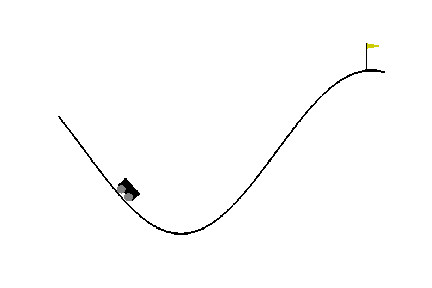
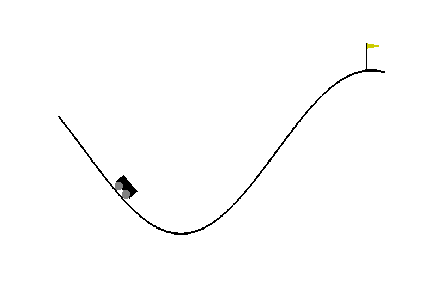
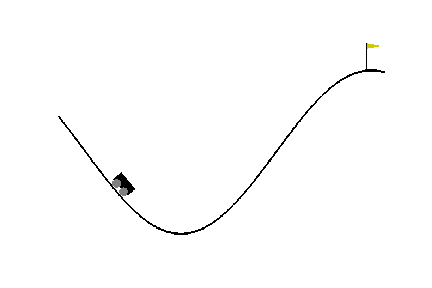
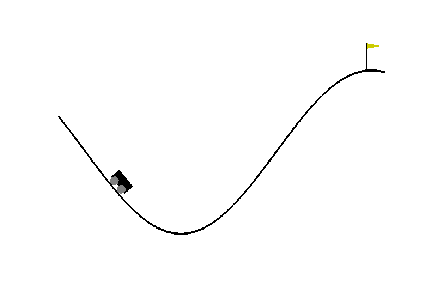
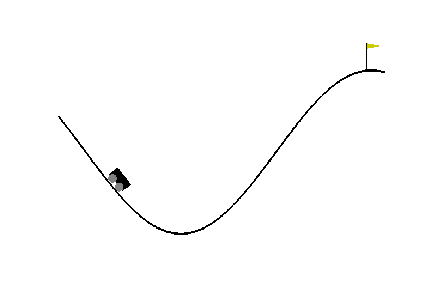
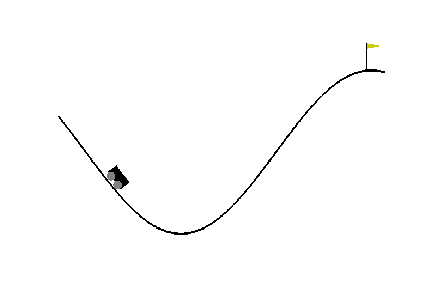
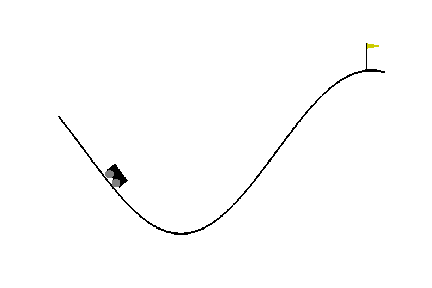
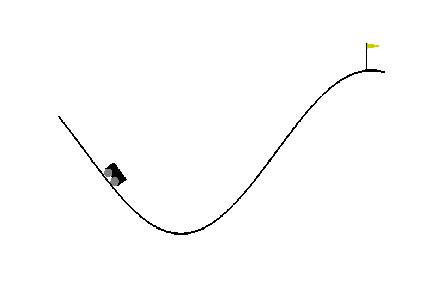
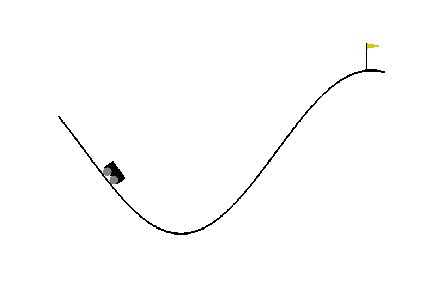
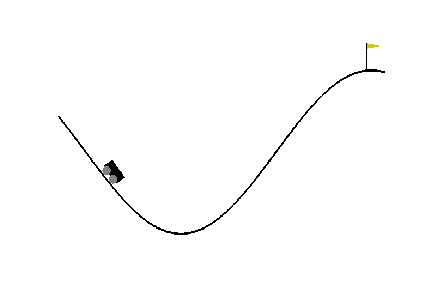
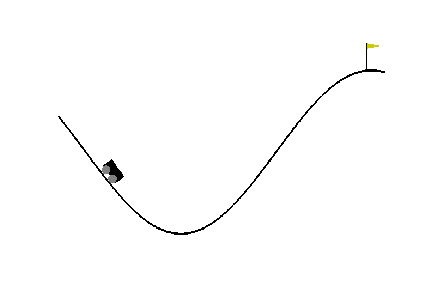
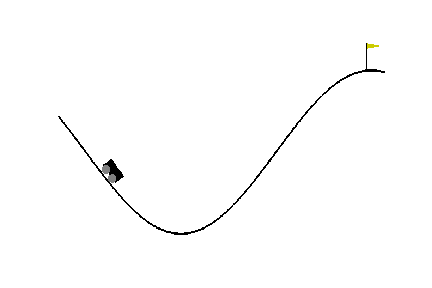
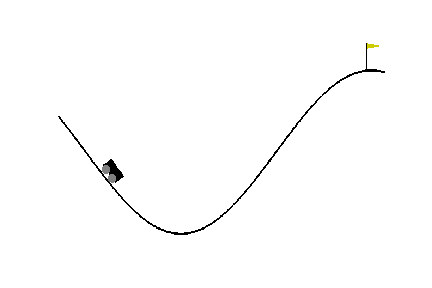
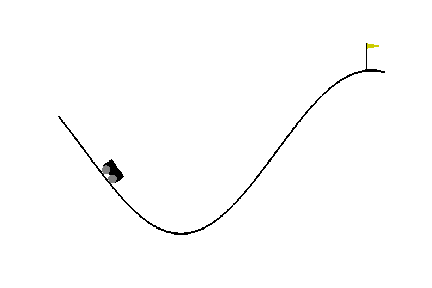
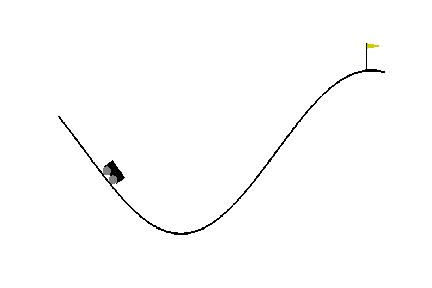
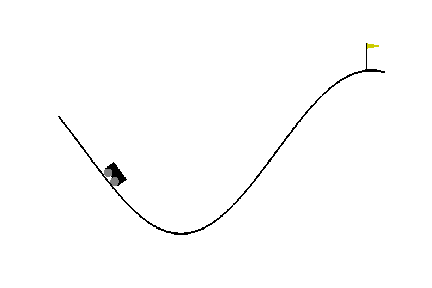
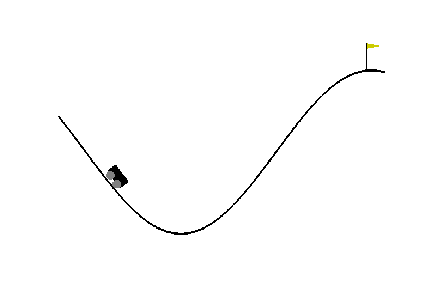
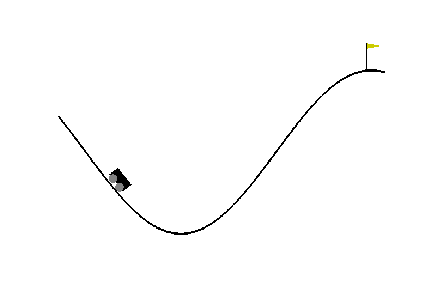
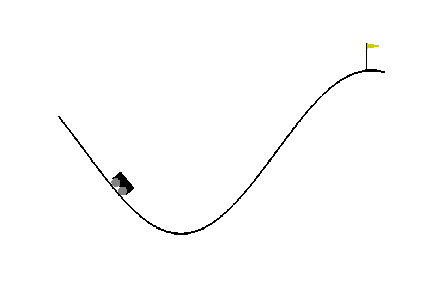
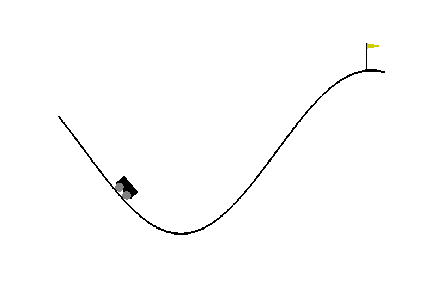
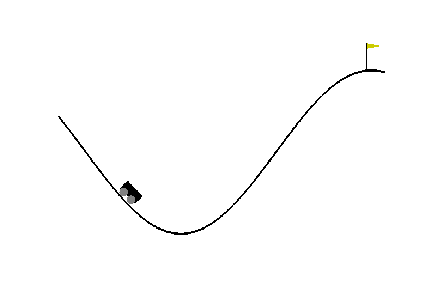
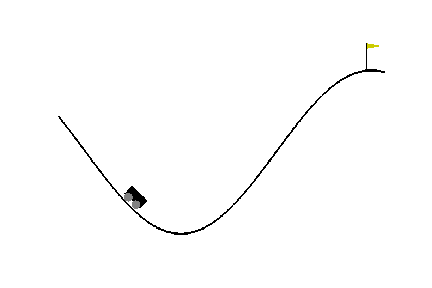
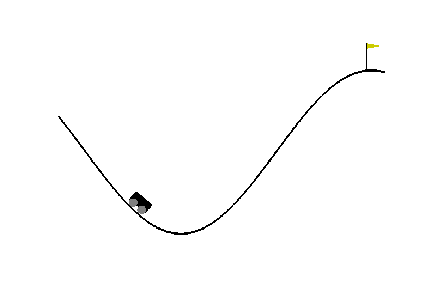
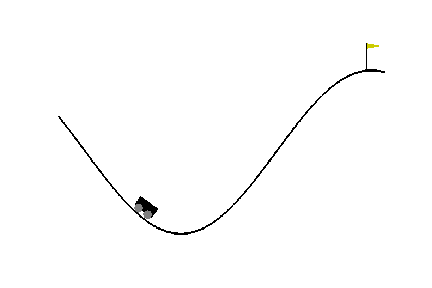
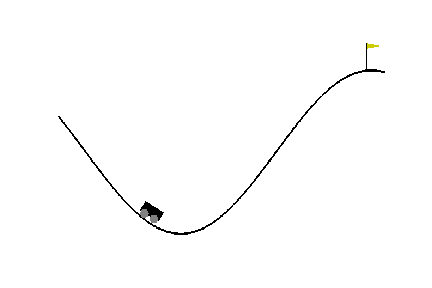
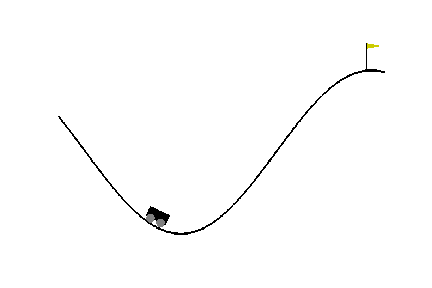
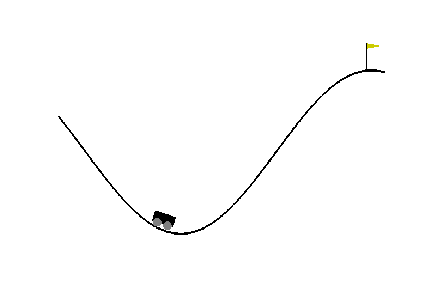
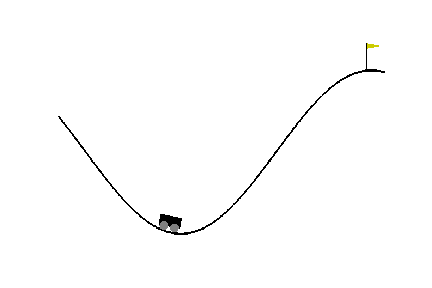
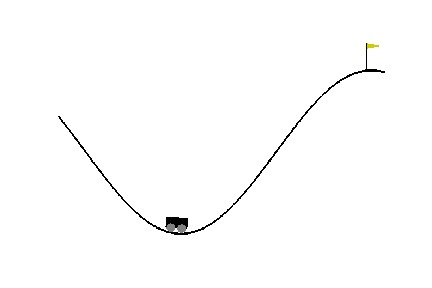
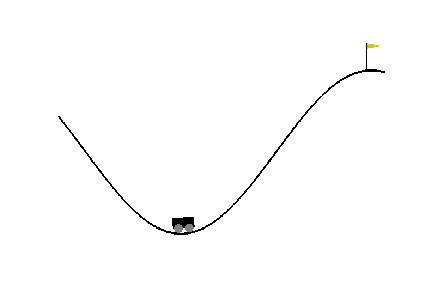
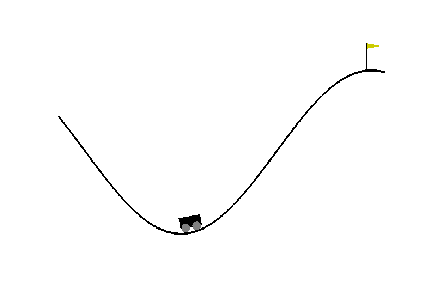
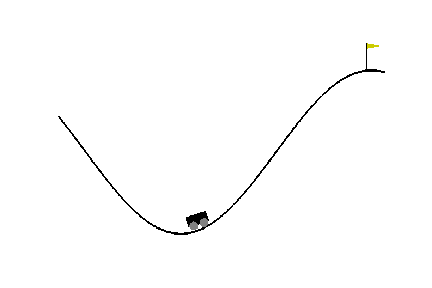
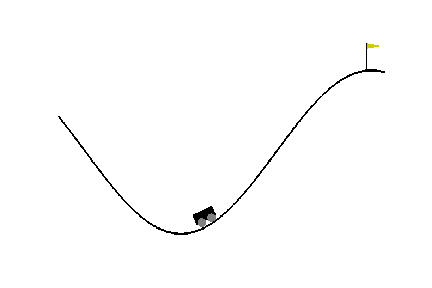
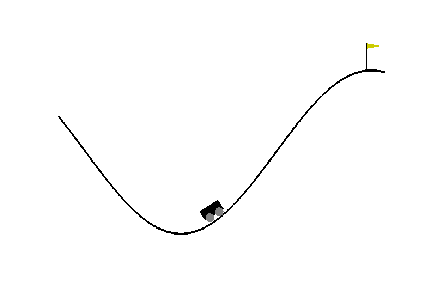
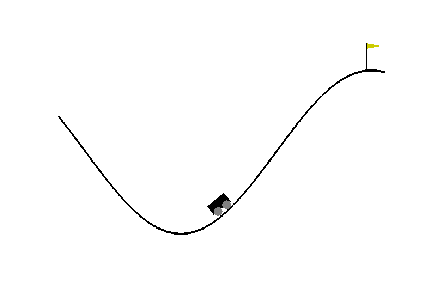
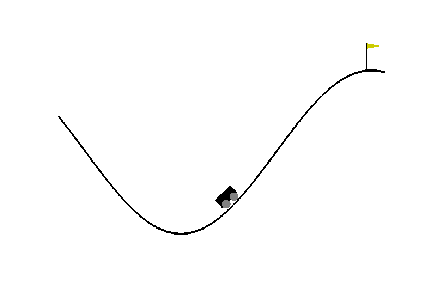
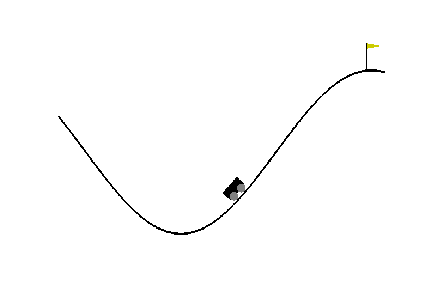
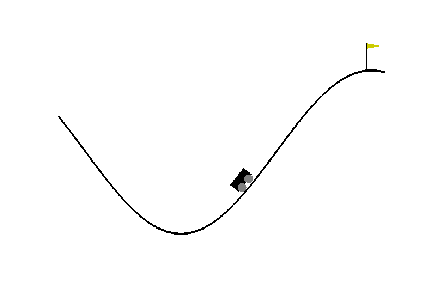
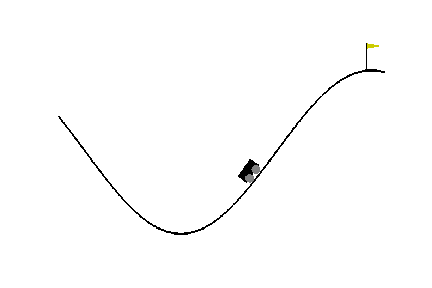
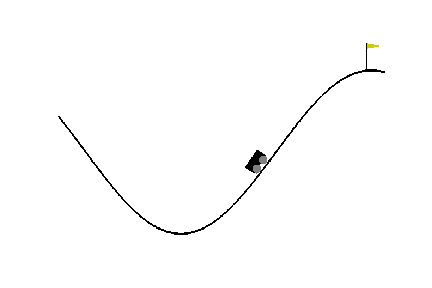
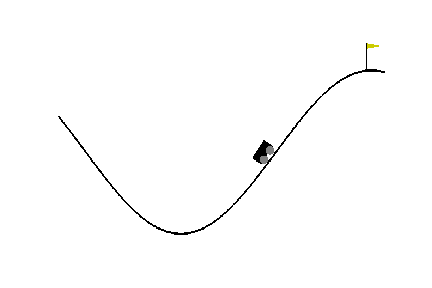
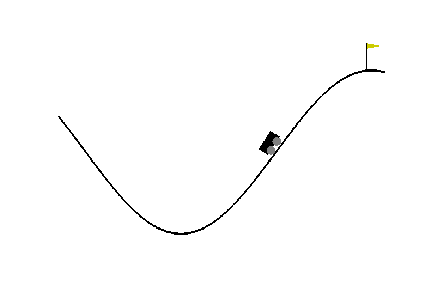
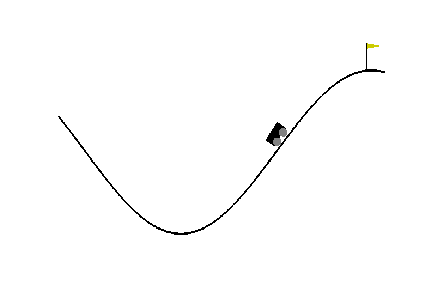
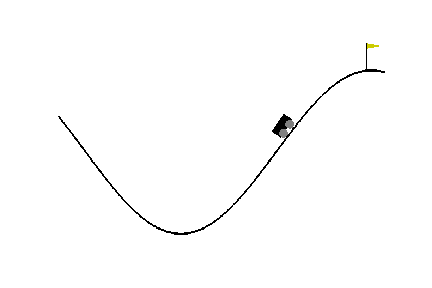
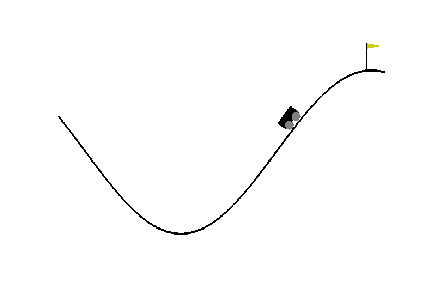
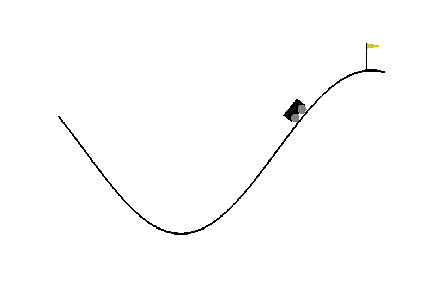
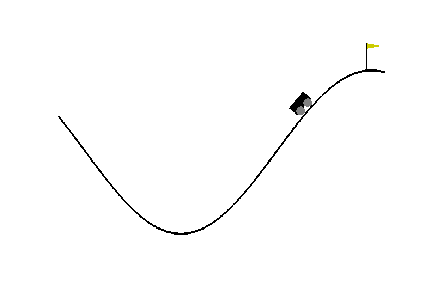
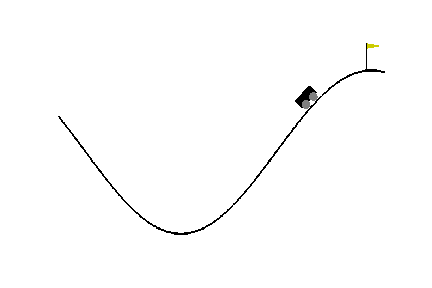
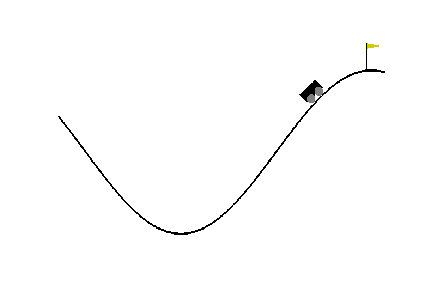
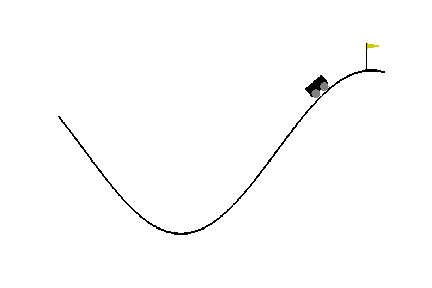
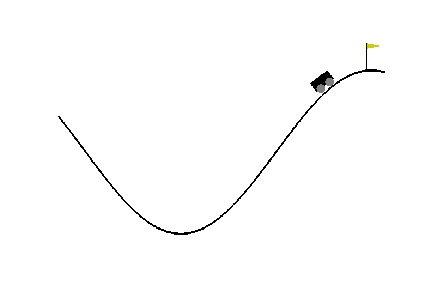
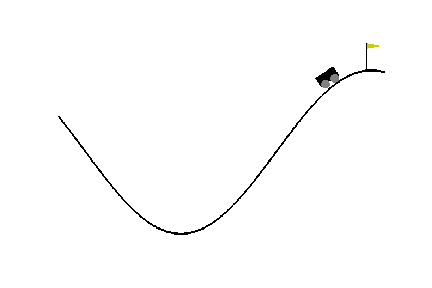
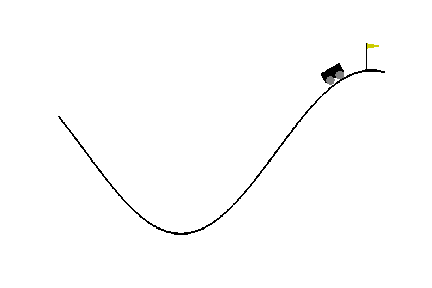
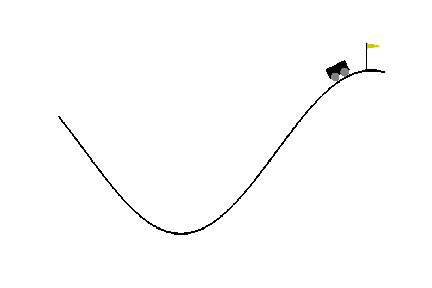
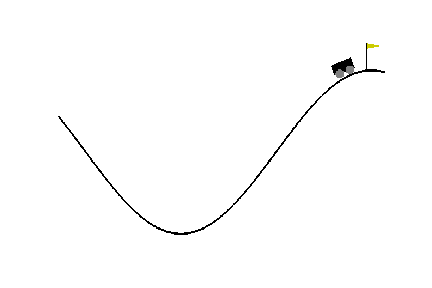
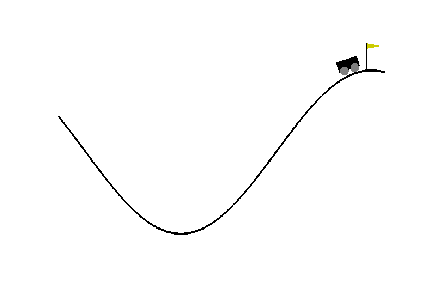
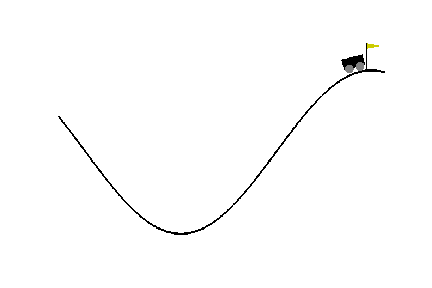
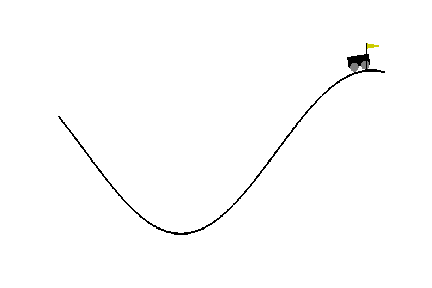
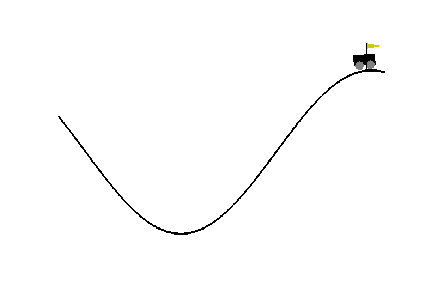

In [21]:
observation = env.reset()
cum_reward = 0
frames = []
for t in range(5000):
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    action = np.argmax(predict(observation))
    observation, reward, done, info = env.step(action)
    #print 'Observation: ', observation
    if done:
        print 'Number of step: ', t
        break
env.render(close=True)
helper.display_frames_as_gif(frames)  #<<< This one for Jupyter Notebook Display